In [1]:
# Problem statement: To Predict the Prices of private residential properties; inside CCR, OCR and RCR region as well as 
#their price difference over the last 5 years


In [2]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import re
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import metrics,linear_model
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso


# Using previous data for merged_house1

In [3]:
merged_house1 = pd.read_csv('./dataset_asof_051121/merged_house1.csv')

In [4]:
pd.set_option('max_columns',None)

In [5]:
merged_house1.shape

(9726, 43)

In [6]:
merged_house1.head()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,0,LANDED HOUSING DEVELOPMENT,PASIR PANJANG DRIVE,999,Resale,1.0,3660000.0,-,2566.0,Land,-,1426.0,Oct-2021,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,OCEAN 8,OCEAN DRIVE,83,Resale,1.0,6920000.0,-,3852.0,Land,-,1796.0,Oct-2021,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,LANDED HOUSING DEVELOPMENT,OCEAN DRIVE,83,Resale,1.0,17888000.0,-,8746.0,Land,-,2045.0,Oct-2021,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,WEST COAST GARDENS,WEST COAST PARK,863,Resale,1.0,5400000.0,-,4806.0,Land,-,1124.0,Oct-2021,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,LANDED HOUSING DEVELOPMENT,JALAN MAS KUNING,999,Resale,1.0,2660000.0,-,1640.0,Land,-,1622.0,Oct-2021,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
merged_house1.tail()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
9721,9723,MIMOSA TERRACE,MIMOSA VIEW,999,Resale,1.0,2330000.0,-,1616.0,Land,-,1442.0,Nov-2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9722,9724,SARACA VILLAS,SARACA TERRACE,75,Resale,1.0,1675000.0,-,2410.0,Land,-,695.0,Nov-2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9723,9725,GERALD GARDENS,GERALD CRESCENT,857,Resale,1.0,2980000.0,-,4192.0,Land,-,711.0,Nov-2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9724,9726,LANDED HOUSING DEVELOPMENT,JALAN SANKAM,999,Resale,1.0,1750000.0,-,2099.0,Land,-,834.0,Nov-2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9725,9727,LANDED HOUSING DEVELOPMENT,NIM ROAD,999,Resale,1.0,10300000.0,-,9955.0,Land,-,1035.0,Nov-2016,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [8]:
merged_house1['type of area'].nunique()

1

In [9]:
merged_house1['type of area'].value_counts()

Land    9726
Name: type of area, dtype: int64

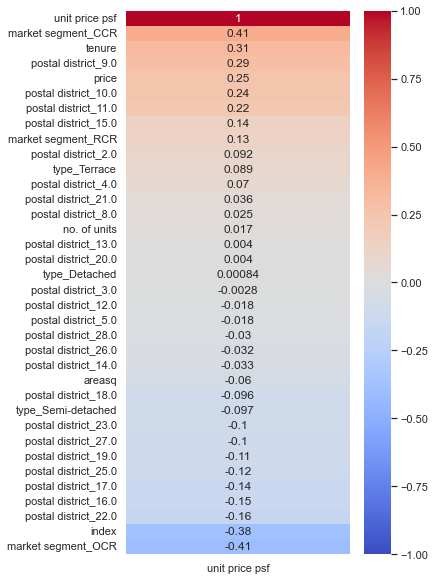

In [10]:
sns.set(font_scale=1)
plt.figure(figsize =(5,10))
sns.heatmap(merged_house1.corr()[['unit price psf']].sort_values('unit price psf', ascending =False), annot=True, vmin = -1, vmax = 1, cmap = 'coolwarm');

In [12]:
X = merged_house1.drop(columns = ['price','unit price psf','project name','street name','type of sale','nett price', 'type of area', 'floor level','date of sale', 'index'])
y = merged_house1['price']

In [13]:
X.head(1)

,tenure,no. of units,areasq,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,999,1.0,2566.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)

In [15]:
# instantiate the model
lr = LinearRegression()
#fit using the training data
lr.fit(X_train, y_train);

In [16]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [17]:
# instantiate the model
lr = LinearRegression()
#fit using the training data
lr.fit(Z_train, y_train);

In [18]:
lr.score(Z_train, y_train)

0.8090571003491375

In [19]:
lr.score(Z_test, y_test)

0.8399817227504702

In [20]:
y_pred = lr.predict(Z_train)

In [21]:
metrics.r2_score(y_train, y_pred)

0.8090571003491375

In [22]:
metrics.mean_squared_error(y_train, y_pred)

5864529886207.752

In [22]:
np.sqrt(metrics.mean_squared_error(y_train, y_pred))

2421679.1460075285

In [23]:
# State the parameters you want to search for lasso regularisation
# we want to go through 1000 different alpha values
parameters = {
                'alpha': [x/1 for x in range(1000)]
             }

# Instantiate the model
lasso = Lasso()

# Instantiate Gridsearch (use previous instantiated parameters and model)
lasso_lr = GridSearchCV(lasso, parameters, 
                     scoring='neg_mean_squared_error', 
                     cv=5, verbose=1, n_jobs=-1)

In [24]:
lasso_lr.fit(Z_train, y_train);

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [25]:
print(lasso_lr.best_params_)

{'alpha': 999.0}


In [26]:
lasso_reg = linear_model.Lasso(alpha = 1, max_iter=10000000, tol=0.1)

In [27]:
lasso_reg.fit(Z_train, y_train)

Lasso(alpha=1, max_iter=10000000, tol=0.1)

In [28]:
lasso_reg.score(Z_train, y_train)

0.8088660010559834

In [29]:
lasso_reg.score(Z_test, y_test)

0.8429568745262974

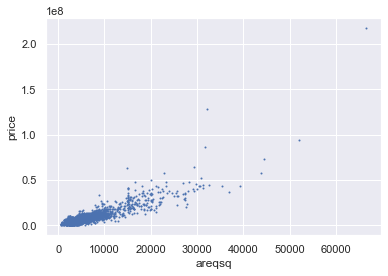

In [38]:
plt.scatter(merged_house1["areasq"], merged_house1["price"], s=1)
plt.xlabel('areqsq')
plt.ylabel('price');

In [39]:
merged_house1['price'].max()

218000000.0

In [40]:
merged_house1['price'].idxmax()

847

In [41]:
merged_house1.loc[847]

index                                          848
project name            LANDED HOUSING DEVELOPMENT
street name                            NASSIM ROAD
tenure                                         999
type of sale                                Resale
no. of units                                   2.0
price                                  218000000.0
nett price                                       -
areasq                                     66453.0
type of area                                  Land
floor level                                      -
unit price psf                              3281.0
date of sale                              Jun-2018
market segment_CCR                               1
market segment_OCR                               0
market segment_RCR                               0
postal district_2.0                              0
postal district_3.0                              0
postal district_4.0                              0
postal district_5.0            

In [42]:
merged_house1.nlargest(10,'price', keep ='all')

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
847,848,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,2.0,218000000.0,-,66453.0,Land,-,3281.0,Jun-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
479,479,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,1.0,128800800.0,-,32160.0,Land,-,4005.0,Mar-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
807,808,LANDED HOUSING DEVELOPMENT,DALVEY ROAD,999,Resale,1.0,93900000.0,-,52059.0,Land,-,1804.0,Sep-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
363,363,QUEEN ASTRID PARK,QUEEN ASTRID PARK,854,Resale,1.0,86000000.0,-,31807.0,Land,-,2704.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
596,597,LANDED HOUSING DEVELOPMENT,LEEDON PARK,999,Resale,1.0,73000000.0,-,44435.0,Land,-,1643.0,Sep-2020,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
379,379,LANDED HOUSING DEVELOPMENT,BISHOPSGATE,999,Resale,1.0,65000000.0,-,29435.0,Land,-,2208.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
451,451,LANDED HOUSING DEVELOPMENT,CLUNY HILL,999,New Sale,1.0,63700000.0,-,14844.0,Land,-,4291.0,Apr-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3281,3283,LANDED HOUSING DEVELOPMENT,AMBER ROAD,999,Resale,4.0,58000000.0,-,22792.0,Land,-,2545.0,Sep-2017,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
911,913,LANDED HOUSING DEVELOPMENT,LEEDON ROAD,999,Resale,1.0,57500000.0,-,43927.0,Land,-,1309.0,Jan-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
388,388,LANDED HOUSING DEVELOPMENT,THIRD AVENUE,999,Resale,1.0,52800000.0,-,30954.0,Land,-,1706.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
merged_house1.nsmallest(10,'unit price psf', keep ='all')

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
2905,2907,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,63000.0,-,1911.0,Land,-,33.0,May-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2971,2973,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,40000.0,-,725.0,Land,-,55.0,Apr-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3353,3355,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,50000.0,-,853.0,Land,-,59.0,Aug-2017,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2803,2805,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,50000.0,-,725.0,Land,-,69.0,Jun-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5486,5488,LANDED HOUSING DEVELOPMENT,BEDOK ROAD,13,Resale,1.0,428000.0,-,4299.0,Land,-,100.0,Jul-2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4826,4828,LANDED HOUSING DEVELOPMENT,JALAN CHEMPAKA KUNING,13,Resale,1.0,500000.0,-,4179.0,Land,-,120.0,Nov-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4812,4814,LANDED HOUSING DEVELOPMENT,JALAN CHEMPAKA KUNING,13,Resale,1.0,330000.0,-,2541.0,Land,-,130.0,Nov-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6179,6181,LANDED HOUSING DEVELOPMENT,BEDOK ROAD,13,Resale,1.0,600000.0,-,4314.0,Land,-,139.0,Mar-2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5271,5273,LANDED HOUSING DEVELOPMENT,JALAN CHEMPAKA KUNING,13,Resale,1.0,330000.0,-,2354.0,Land,-,140.0,Dec-2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8202,8204,LANDED HOUSING DEVELOPMENT,JALAN UJI,25,Resale,1.0,800000.0,-,5729.0,Land,-,140.0,Mar-2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Remove a total of 5% of data especially on the outliers, 2.5% on highest and 2.5% on smallest

In [44]:
merged_house1.shape

(9726, 43)

In [45]:
9726/100 *2.5/2

121.575

## Remove 121 rows for largest and smallest

In [46]:
biggest = merged_house1.nlargest(121,'price', keep ='all')
smallest = merged_house1.nsmallest(121,'price', keep ='all')

In [47]:
merged_house1 = merged_house1.sort_values(by = ['price'], ascending = False)

In [48]:
merged_house1.head()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
847,848,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,2.0,218000000.0,-,66453.0,Land,-,3281.0,Jun-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
479,479,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,1.0,128800800.0,-,32160.0,Land,-,4005.0,Mar-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
807,808,LANDED HOUSING DEVELOPMENT,DALVEY ROAD,999,Resale,1.0,93900000.0,-,52059.0,Land,-,1804.0,Sep-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
363,363,QUEEN ASTRID PARK,QUEEN ASTRID PARK,854,Resale,1.0,86000000.0,-,31807.0,Land,-,2704.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
596,597,LANDED HOUSING DEVELOPMENT,LEEDON PARK,999,Resale,1.0,73000000.0,-,44435.0,Land,-,1643.0,Sep-2020,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
merged_house1.drop(['index'], axis=1, inplace = True)

In [50]:
merged_house1.head()

,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
847,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,2.0,218000000.0,-,66453.0,Land,-,3281.0,Jun-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
479,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,1.0,128800800.0,-,32160.0,Land,-,4005.0,Mar-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
807,LANDED HOUSING DEVELOPMENT,DALVEY ROAD,999,Resale,1.0,93900000.0,-,52059.0,Land,-,1804.0,Sep-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
363,QUEEN ASTRID PARK,QUEEN ASTRID PARK,854,Resale,1.0,86000000.0,-,31807.0,Land,-,2704.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
596,LANDED HOUSING DEVELOPMENT,LEEDON PARK,999,Resale,1.0,73000000.0,-,44435.0,Land,-,1643.0,Sep-2020,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
merged_house1.reset_index(drop = False , inplace = True)

In [52]:
merged_house1.head(3)

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,847,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,2.0,218000000.0,-,66453.0,Land,-,3281.0,Jun-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,479,LANDED HOUSING DEVELOPMENT,NASSIM ROAD,999,Resale,1.0,128800800.0,-,32160.0,Land,-,4005.0,Mar-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,807,LANDED HOUSING DEVELOPMENT,DALVEY ROAD,999,Resale,1.0,93900000.0,-,52059.0,Land,-,1804.0,Sep-2018,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


(array([1.600e+03, 5.486e+03, 1.419e+03, 4.770e+02, 2.310e+02, 1.600e+02,
        8.300e+01, 4.600e+01, 4.500e+01, 2.400e+01, 3.000e+01, 1.700e+01,
        1.900e+01, 1.200e+01, 1.200e+01, 1.000e+01, 1.200e+01, 8.000e+00,
        9.000e+00, 4.000e+00, 6.000e+00, 2.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

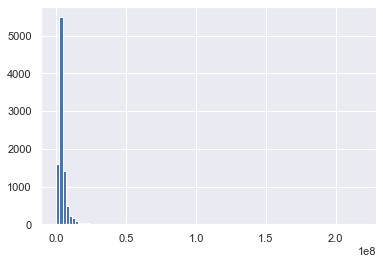

In [53]:
price = merged_house1['price']

plt.hist(price, bins =100)

In [54]:
merged_houseP = merged_house1.copy(deep = True)

In [55]:
merged_houseP.tail(121)

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
9605,8279,VILLA VERDE,VERDE CRESCENT,75,Resale,1.0,1350000.0,-,1615.0,Land,-,836.0,Jan-2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9606,5166,LOYANG VILLAS,LOYANG RISE,71,Resale,1.0,1350000.0,-,1620.0,Land,-,833.0,Mar-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9607,8616,WESTWOOD PARK,WESTWOOD DRIVE,72,Resale,1.0,1350000.0,-,1615.0,Land,-,836.0,Feb-2017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9608,8598,WESTWOOD PARK,WESTWOOD DRIVE,72,Resale,1.0,1350000.0,-,1615.0,Land,-,836.0,Feb-2017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9609,7926,WESTVILLE,WESTWOOD CRESCENT,72,Resale,1.0,1350000.0,-,1609.0,Land,-,839.0,Feb-2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,4812,LANDED HOUSING DEVELOPMENT,JALAN CHEMPAKA KUNING,13,Resale,1.0,330000.0,-,2541.0,Land,-,130.0,Nov-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9722,2905,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,63000.0,-,1911.0,Land,-,33.0,May-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9723,2803,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,50000.0,-,725.0,Land,-,69.0,Jun-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9724,3353,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,50000.0,-,853.0,Land,-,59.0,Aug-2017,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
merged_houseP.tail()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
9721,4812,LANDED HOUSING DEVELOPMENT,JALAN CHEMPAKA KUNING,13,Resale,1.0,330000.0,-,2541.0,Land,-,130.0,Nov-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9722,2905,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,63000.0,-,1911.0,Land,-,33.0,May-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9723,2803,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,50000.0,-,725.0,Land,-,69.0,Jun-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9724,3353,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,50000.0,-,853.0,Land,-,59.0,Aug-2017,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9725,2971,LANDED HOUSING DEVELOPMENT,LORONG 3 GEYLANG,0,Resale,1.0,40000.0,-,725.0,Land,-,55.0,Apr-2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
merged_houseP.shape

(9726, 43)

In [58]:
merged_houseP.iloc[121]

index                                          429
project name            LANDED HOUSING DEVELOPMENT
street name                           HOLLAND PARK
tenure                                         999
type of sale                                Resale
no. of units                                   1.0
price                                   24500000.0
nett price                                       -
areasq                                     14416.0
type of area                                  Land
floor level                                      -
unit price psf                              1699.0
date of sale                              May-2021
market segment_CCR                               1
market segment_OCR                               0
market segment_RCR                               0
postal district_2.0                              0
postal district_3.0                              0
postal district_4.0                              0
postal district_5.0            

In [59]:
merged_houseP = merged_houseP[merged_houseP['price'] <= 24500000.0]

In [60]:
merged_houseP = merged_houseP[merged_houseP['price'] >= 1350000.0]

In [61]:
merged_houseP.shape

(9490, 43)

In [62]:
merged_houseP.head()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
121,429,LANDED HOUSING DEVELOPMENT,HOLLAND PARK,999,Resale,1.0,24500000.0,-,14416.0,Land,-,1699.0,May-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
122,1377,LANDED HOUSING DEVELOPMENT,SWISS CLUB LANE,999,Resale,1.0,24500000.0,-,17558.0,Land,-,1395.0,Jul-2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
123,365,LANDED HOUSING DEVELOPMENT,BUKIT TIMAH ROAD,999,Resale,1.0,24480000.0,-,16892.0,Land,-,1449.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
124,578,LANDED HOUSING DEVELOPMENT,GALLOP PARK ROAD,999,Resale,1.0,24150000.0,-,15004.0,Land,-,1610.0,Nov-2020,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
125,131,LANDED HOUSING DEVELOPMENT,COVE GROVE,86,Resale,1.0,24000000.0,-,9740.0,Land,-,2464.0,Feb-2020,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
merged_houseP.drop(['index'], axis=1, inplace = True)

In [64]:
merged_houseP.head(3)

,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
121,LANDED HOUSING DEVELOPMENT,HOLLAND PARK,999,Resale,1.0,24500000.0,-,14416.0,Land,-,1699.0,May-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
122,LANDED HOUSING DEVELOPMENT,SWISS CLUB LANE,999,Resale,1.0,24500000.0,-,17558.0,Land,-,1395.0,Jul-2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
123,LANDED HOUSING DEVELOPMENT,BUKIT TIMAH ROAD,999,Resale,1.0,24480000.0,-,16892.0,Land,-,1449.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
merged_houseP.reset_index(drop = True , inplace = True)

In [66]:
merged_houseP.head(3)

,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,LANDED HOUSING DEVELOPMENT,HOLLAND PARK,999,Resale,1.0,24500000.0,-,14416.0,Land,-,1699.0,May-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,LANDED HOUSING DEVELOPMENT,SWISS CLUB LANE,999,Resale,1.0,24500000.0,-,17558.0,Land,-,1395.0,Jul-2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,LANDED HOUSING DEVELOPMENT,BUKIT TIMAH ROAD,999,Resale,1.0,24480000.0,-,16892.0,Land,-,1449.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
merged_houseP.reset_index(drop = False , inplace = True)

In [68]:
merged_houseP.head(1)

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,0,LANDED HOUSING DEVELOPMENT,HOLLAND PARK,999,Resale,1.0,24500000.0,-,14416.0,Land,-,1699.0,May-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
merged_houseP.shape

(9490, 43)

(array([ 684.,  922., 1441., 1603., 1055.,  896.,  577.,  425.,  317.,
         203.,  213.,  167.,  105.,  100.,   90.,   69.,   62.,   51.,
          45.,   53.,   34.,   40.,   24.,   34.,   31.,   30.,   20.,
          20.,   14.,   15.,   15.,    8.,    9.,   14.,    3.,   12.,
           9.,   11.,    8.,    4.,    6.,    6.,    7.,    2.,    7.,
           2.,    7.,    7.,    9.,    4.]),
 array([ 1350000.,  1813000.,  2276000.,  2739000.,  3202000.,  3665000.,
         4128000.,  4591000.,  5054000.,  5517000.,  5980000.,  6443000.,
         6906000.,  7369000.,  7832000.,  8295000.,  8758000.,  9221000.,
         9684000., 10147000., 10610000., 11073000., 11536000., 11999000.,
        12462000., 12925000., 13388000., 13851000., 14314000., 14777000.,
        15240000., 15703000., 16166000., 16629000., 17092000., 17555000.,
        18018000., 18481000., 18944000., 19407000., 19870000., 20333000.,
        20796000., 21259000., 21722000., 22185000., 22648000., 23111000.,
        

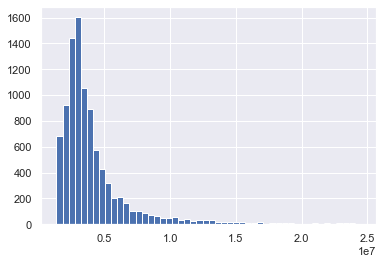

In [70]:
price = merged_houseP['price']

plt.hist(price, bins =50)
# still skewed to left

In [71]:
X1 = merged_houseP.drop(columns = ['price','unit price psf','project name','street name','type of sale','nett price', 'type of area', 'floor level','date of sale', 'index'])
y1 = merged_houseP['price']

In [72]:
# Create train/test splits.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size =0.25, random_state=42)

In [73]:
sc = StandardScaler()
Z1_train = sc.fit_transform(X1_train)
Z1_test = sc.transform(X1_test)

In [74]:
lr.fit(Z1_train, y1_train)

LinearRegression()

In [75]:
lr.score(Z1_train, y1_train)

0.8526242398197443

In [76]:
lr.score(Z1_test, y1_test)

0.8740904576567516

In [77]:
y_pred1 = lr.predict(Z1_train)

In [78]:
metrics.r2_score(y1_train, y_pred1)

0.8526242398197443

In [79]:
metrics.mean_squared_error(y1_train, y_pred1)

1211087345968.0999

In [80]:
np.sqrt(metrics.mean_squared_error(y1_train, y_pred1))

1100494.1371802485

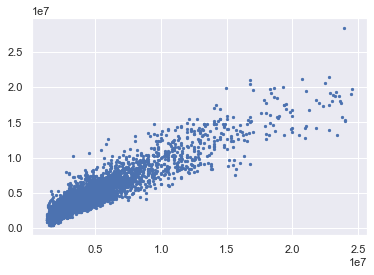

In [81]:
plt.scatter(y1_train, y_pred1, s = 5)

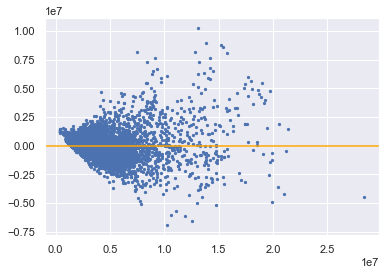

In [82]:
plt.scatter(y_pred1, y1_train - y_pred1, s=5)
plt.axhline(0, color ='orange');

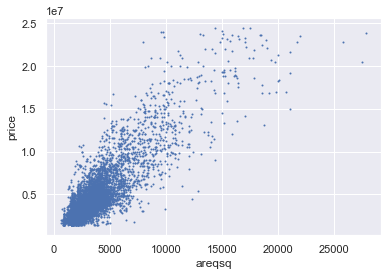

In [83]:
plt.scatter(merged_houseP["areasq"], merged_houseP["price"], s=1)
plt.xlabel('areqsq')
plt.ylabel('price');

In [84]:
# State the parameters you want to search for lasso regularisation
# we want to go through 1000 different alpha values
parameters = {
                'alpha': [x/1 for x in range(1000)]
             }

# Instantiate the model
lasso = Lasso()

# Instantiate Gridsearch (use previous instantiated parameters and model)
lasso_lr1 = GridSearchCV(lasso, parameters, 
                     scoring='neg_mean_squared_error', 
                     cv=5, verbose=1, n_jobs=-1)

In [85]:
lasso_lr1.fit(Z1_train, y1_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\Users\jiexi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9118901848187.0, tolerance: 5848525314280.089
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0,
                                   16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
                                   23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, ...]},
             scoring='neg_mean_squared_error', verbose=1)

In [86]:
print(lasso_lr.best_params_)

{'alpha': 999.0}


In [87]:
lasso_reg = linear_model.Lasso(alpha = 1, max_iter=10000000, tol=0.1)

In [88]:
lasso_reg.fit(Z1_train, y1_train)

Lasso(alpha=1, max_iter=10000000, tol=0.1)

In [89]:
lasso_reg.score(Z1_train, y1_train)

0.8500270365268378

In [90]:
lasso_reg.score(Z1_test, y1_test)

0.8736835551297262

## XGB Boost

In [91]:
XGB = XGBRegressor()
XGB.fit(Z1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [92]:
XGB.score(Z1_train, y1_train)

0.9578461491224428

In [93]:
XGB.score(Z1_test, y1_test)

0.9069954943183068

In [94]:
y_pred2 = XGB.predict(Z1_train)
print(metrics.r2_score(y1_train, y_pred2))
print(metrics.mean_squared_error(y1_train, y_pred2))
print(np.sqrt(metrics.mean_squared_error(y1_train, y_pred2)))

0.9578461491224428
346407002882.93024
588563.5079436459


In [95]:
def xgb(search):
    colsample_bytree = search.suggest_float("colsample_bytree", 0.1, 1.0)
    learning_rate = search.suggest_float("learning_rate", 0.1, 1.0) 
    max_depth = search.suggest_int("max_depth",1, 5)
    min_child_weight = search.suggest_int("min_child_weight", 1, 5)
    n_estimator = search.suggest_int("n_estimators", 100, 300)
    reg_lambda = search.suggest_loguniform("reg_lambda", 1e-8, 100)
    reg_alpha = search.suggest_loguniform("reg_alpha", 1e-8, 100)
    sub_sample = search.suggest_float("sub_sample", 0.1, 1.0)
    
    model = XGBRegressor(random_state = 42,
                         colsample_bytree = colsample_bytree,
                         learning_rate = learning_rate,
                         max_depth = max_depth,
                         min_child_weight = min_child_weight,
                         n_estimator = n_estimator,
                         reg_lambda = reg_lambda, 
                         reg_alpha = reg_alpha,
                         sub_sample = sub_sample,
                         n_jobs = -1
                        )
    
    score = cross_val_score(model, Z1_train, y1_train, scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 1)
    mean_score = score.mean()
    std_score = score.std()
    
    accuracy = mean_score - std_score
    
    return accuracy

study = optuna.create_study(direction = 'maximize', sampler = TPESampler(seed =42))
study.optimize(xgb, n_trials=100)

[I 2021-12-15 02:35:02,851] A new study created in memory with name: no-name-db82b7f9-1540-417f-bb3f-7064f9c0692d
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:03,410] Trial 0 finished with value: -1178604.3506788453 and parameters: {'colsample_bytree': 0.4370861069626263, 'learning_rate': 0.9556428757689246, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 131, 'reg_lambda': 3.6303224667798554e-07, 'reg_alpha': 3.809220577048033e-08, 'sub_sample': 0.8795585311974417}. Best is trial 0 with value: -1178604.3506788453.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:35:03,731] Trial 1 finished with value: -1152215.737995722 and parameters: {'colsample_bytree': 0.6410035105688879, 'learning_rate': 0.737265320016441, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 267, 'reg_lambda': 1.3285903900544182e-06, 'reg_alpha': 6.580360277501306e-07, 'sub_sample': 0.2650640588680905}. Best is trial 1 with value: -1152215.737995722.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:35:04,186] Trial 2 finished with value: -1072213.3907647894 and parameters: {'colsample_bytree': 0.373818018663584, 'learning_rate': 0.5722807884690141, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 222, 'reg_lambda': 2.4827821051950883e-07, 'reg_alpha': 8.345387083873532e-06, 'sub_sample': 0.4297256589643226}. Best is trial 2 with value: -1072213.3907647894.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:35:04,459] Trial 3 finished with value: -1162421.9866217594 and parameters: {'colsample_bytree': 0.5104629857953323, 'learning_rate': 0.8066583652537123, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 219, 'reg_lambda': 2.9140978279786215e-08, 'reg_alpha': 0.011897302909454906, 'sub_sample': 0.2534717113185624}. Best is trial 2 with value: -1072213.3907647894.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:35:04,938] Trial 4 finished with value: -1169655.8271723734 and parameters: {'colsample_bytree': 0.1585464336867516, 'learning_rate': 0.9539969835279999, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 161, 'reg_lambda': 9.478096804784244e-08, 'reg_alpha': 0.06955530592645753, 'sub_sample': 0.4961372443656412}. Best is trial 2 with value: -1072213.3907647894.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:35:05,193] Trial 5 finished with value: -1200857.41235691 and parameters: {'colsample_bytree': 0.20983441136030095, 'learning_rate': 0.5456592191001431, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 152, 'reg_lambda': 0.042191293826476094, 'reg_alpha': 1.3095158546031483e-05, 'sub_sample': 0.5680612190600297}. Best is trial 2 with value: -1072213.3907647894.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:05,914] Trial 6 finished with value: -1039465.8559592576 and parameters: {'colsample_bytree': 0.5920392514089517, 'learning_rate': 0.26636900997297436, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 288, 'reg_lambda': 8.8771488946556, 'reg_alpha': 0.00952795699161383, 'sub_sample': 0.9296868115208051}. Best is trial 6 with value: -1039465.8559592576.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:35:06,180] Trial 7 finished with value: -1217687.1394840742 and parameters: {'colsample_bytree': 0.17964325184672755, 'learning_rate': 0.27638457617723067, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 178, 'reg_lambda': 5.169997317292732e-06, 'reg_alpha': 1.9380951355796903, 'sub_sample': 0.4210779940242304}. Best is trial 6 with value: -1039465.8559592576.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:35:06,463] Trial 8 finished with value: -1182504.4182705346 and parameters: {'colsample_bytree': 0.3528410587186427, 'learning_rate': 0.5884264748424236, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 114, 'reg_lambda': 73.9382838287635, 'reg_alpha': 0.5277736371601186, 'sub_sample': 0.2788441133807552}. Best is trial 6 with value: -1039465.8559592576.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:35:06,858] Trial 9 finished with value: -1125029.1221566394 and parameters: {'colsample_bytree': 0.10496990541124217, 'learning_rate': 0.8339152856093507, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 255, 'reg_lambda': 5.50106171658889e-08, 'reg_alpha': 3.842884090673403e-05, 'sub_sample': 0.20428215357261675}. Best is trial 6 with value: -1039465.8559592576.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:07,753] Trial 10 finished with value: -1033672.8052702772 and parameters: {'colsample_bytree': 0.9497157666716347, 'learning_rate': 0.10539746466023536, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 297, 'reg_lambda': 11.930206277066471, 'reg_alpha': 39.6011191452442, 'sub_sample': 0.9790910709802578}. Best is trial 10 with value: -1033672.8052702772.


[02:35:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:08,654] Trial 11 finished with value: -1018805.3206209613 and parameters: {'colsample_bytree': 0.9522656887511342, 'learning_rate': 0.10326321505087403, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 295, 'reg_lambda': 82.82843195255043, 'reg_alpha': 73.24607527580478, 'sub_sample': 0.971643831619738}. Best is trial 11 with value: -1018805.3206209613.


[02:35:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:09,373] Trial 12 finished with value: -1025747.5691775626 and parameters: {'colsample_bytree': 0.9949059251685877, 'learning_rate': 0.10373517481763485, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 297, 'reg_lambda': 0.42595609360821496, 'reg_alpha': 93.56287774580974, 'sub_sample': 0.7744119702768277}. Best is trial 11 with value: -1018805.3206209613.


[02:35:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:10,070] Trial 13 finished with value: -1034283.4188641321 and parameters: {'colsample_bytree': 0.9923889994877089, 'learning_rate': 0.13022729644102515, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 253, 'reg_lambda': 0.09191818632941383, 'reg_alpha': 98.54268387927638, 'sub_sample': 0.7487446932356276}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:10,821] Trial 14 finished with value: -1067921.6927786777 and parameters: {'colsample_bytree': 0.8047400065328008, 'learning_rate': 0.31701049702472994, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 298, 'reg_lambda': 0.1486353880687825, 'reg_alpha': 4.49095926171618, 'sub_sample': 0.7553182945152687}. Best is trial 11 with value: -1018805.3206209613.


[02:35:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:11,559] Trial 15 finished with value: -1079912.4989966413 and parameters: {'colsample_bytree': 0.8169129273301083, 'learning_rate': 0.3612452294576492, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 232, 'reg_lambda': 0.00018025803962518349, 'reg_alpha': 0.0003789659766488016, 'sub_sample': 0.7827566001586518}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:35:12,009] Trial 16 finished with value: -1057346.4783030632 and parameters: {'colsample_bytree': 0.8303337242530464, 'learning_rate': 0.43188315965638413, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 269, 'reg_lambda': 1.5420105029255722, 'reg_alpha': 11.39862610102869, 'sub_sample': 0.6370008560986724}. Best is trial 11 with value: -1018805.3206209613.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:12,823] Trial 17 finished with value: -1065209.3330940837 and parameters: {'colsample_bytree': 0.7036305397681726, 'learning_rate': 0.1897186625238846, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 190, 'reg_lambda': 0.003946016809606652, 'reg_alpha': 0.21262950813712359, 'sub_sample': 0.8287197654303445}. Best is trial 11 with value: -1018805.3206209613.


[02:35:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:13,428] Trial 18 finished with value: -1039801.6065364763 and parameters: {'colsample_bytree': 0.9163453050674848, 'learning_rate': 0.20884669812155093, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 280, 'reg_lambda': 1.3801842138985658, 'reg_alpha': 98.48803995555136, 'sub_sample': 0.6660322407747229}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:14,190] Trial 19 finished with value: -1027321.8564334532 and parameters: {'colsample_bytree': 0.8868086011496393, 'learning_rate': 0.43788031709507497, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 241, 'reg_lambda': 78.95053518994118, 'reg_alpha': 0.002553868752238076, 'sub_sample': 0.9793726075377597}. Best is trial 11 with value: -1018805.3206209613.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:35:14,634] Trial 20 finished with value: -1055125.4572067438 and parameters: {'colsample_bytree': 0.6967457638928767, 'learning_rate': 0.1897110788190517, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 209, 'reg_lambda': 0.0001265331226432189, 'reg_alpha': 1.784782601101322, 'sub_sample': 0.8773702935791904}. Best is trial 11 with value: -1018805.3206209613.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:15,369] Trial 21 finished with value: -1026582.3579257946 and parameters: {'colsample_bytree': 0.8889411092272578, 'learning_rate': 0.4389021688663034, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 250, 'reg_lambda': 67.23432431849533, 'reg_alpha': 0.0014911648303463964, 'sub_sample': 0.9745025822356856}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:16,310] Trial 22 finished with value: -1107081.0889459779 and parameters: {'colsample_bytree': 0.9866668530873444, 'learning_rate': 0.4130672880070037, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 278, 'reg_lambda': 1.216794414075562, 'reg_alpha': 0.00018520514764359673, 'sub_sample': 0.8972687794539305}. Best is trial 11 with value: -1018805.3206209613.


[02:35:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:17,050] Trial 23 finished with value: -1086932.2857939 and parameters: {'colsample_bytree': 0.7468655799630234, 'learning_rate': 0.6610395059985809, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 252, 'reg_lambda': 6.300524325394594, 'reg_alpha': 0.05603548885547808, 'sub_sample': 0.9905151299789032}. Best is trial 11 with value: -1018805.3206209613.


[02:35:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:17,794] Trial 24 finished with value: -1042273.4928791933 and parameters: {'colsample_bytree': 0.8595408329917485, 'learning_rate': 0.11558076692024909, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 269, 'reg_lambda': 0.005969179865207776, 'reg_alpha': 10.268169461200571, 'sub_sample': 0.7012754888435588}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:35:18,358] Trial 25 finished with value: -1044468.7223847324 and parameters: {'colsample_bytree': 0.9134501664964756, 'learning_rate': 0.49301036087477573, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 292, 'reg_lambda': 42.63606645131115, 'reg_alpha': 1.6933382597373973e-08, 'sub_sample': 0.7955728472159783}. Best is trial 11 with value: -1018805.3206209613.


[02:35:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:19,172] Trial 26 finished with value: -1077349.0358145179 and parameters: {'colsample_bytree': 0.7827399725986719, 'learning_rate': 0.24484812522004112, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 241, 'reg_lambda': 0.3890617195882376, 'reg_alpha': 8.222116549082374e-07, 'sub_sample': 0.8669269736998078}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:19,883] Trial 27 finished with value: -1057839.6008888602 and parameters: {'colsample_bytree': 0.989657943879117, 'learning_rate': 0.315068423232436, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'reg_lambda': 16.978918847151533, 'reg_alpha': 0.6463444499713228, 'sub_sample': 0.5982586116228149}. Best is trial 11 with value: -1018805.3206209613.


[02:35:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:20,744] Trial 28 finished with value: -1053964.0845279177 and parameters: {'colsample_bytree': 0.8881104851068768, 'learning_rate': 0.16656557747850187, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 279, 'reg_lambda': 0.03251577885469551, 'reg_alpha': 27.28497175216972, 'sub_sample': 0.9229399664445516}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:21,408] Trial 29 finished with value: -1061285.4449865352 and parameters: {'colsample_bytree': 0.7355954490256411, 'learning_rate': 0.3400100419469911, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 258, 'reg_lambda': 4.179141679782325, 'reg_alpha': 4.448996188984284e-07, 'sub_sample': 0.8335687214917366}. Best is trial 11 with value: -1018805.3206209613.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:35:21,808] Trial 30 finished with value: -1054316.8340155433 and parameters: {'colsample_bytree': 0.5044314796739295, 'learning_rate': 0.6485441231867455, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 198, 'reg_lambda': 0.3614566811411905, 'reg_alpha': 1.717071460483794e-07, 'sub_sample': 0.7164815378249652}. Best is trial 11 with value: -1018805.3206209613.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:22,528] Trial 31 finished with value: -1025701.2730522248 and parameters: {'colsample_bytree': 0.877543859344874, 'learning_rate': 0.4602230076063477, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 237, 'reg_lambda': 85.24403803932569, 'reg_alpha': 0.009401957085078164, 'sub_sample': 0.9970264829346807}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:35:23,088] Trial 32 finished with value: -1053708.367592151 and parameters: {'colsample_bytree': 0.9364655954314152, 'learning_rate': 0.5087995164110648, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 236, 'reg_lambda': 20.777159307498316, 'reg_alpha': 0.0022237522850730917, 'sub_sample': 0.9984435703528712}. Best is trial 11 with value: -1018805.3206209613.


[02:35:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:35:23,640] Trial 33 finished with value: -1040630.9172955086 and parameters: {'colsample_bytree': 0.6417583707493677, 'learning_rate': 0.39841506487880635, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 223, 'reg_lambda': 93.27193335288804, 'reg_alpha': 0.00012815441646353752, 'sub_sample': 0.9275853746665}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:24,349] Trial 34 finished with value: -1087468.6338183403 and parameters: {'colsample_bytree': 0.866405661757262, 'learning_rate': 0.4814584576256619, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 264, 'reg_lambda': 4.923378943857253, 'reg_alpha': 0.0008399556022874785, 'sub_sample': 0.9439764789649084}. Best is trial 11 with value: -1018805.3206209613.


[02:35:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:25,220] Trial 35 finished with value: -1199878.5766094462 and parameters: {'colsample_bytree': 0.9387033550584074, 'learning_rate': 0.7353193389986489, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 210, 'reg_lambda': 0.9117448012274192, 'reg_alpha': 0.010209024275480996, 'sub_sample': 0.8469103120721326}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:26,010] Trial 36 finished with value: -1096940.8484761254 and parameters: {'colsample_bytree': 0.7796193910811748, 'learning_rate': 0.9833809984295638, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 279, 'reg_lambda': 30.2353218246325, 'reg_alpha': 0.07241058843071152, 'sub_sample': 0.8818026720483194}. Best is trial 11 with value: -1018805.3206209613.


[02:35:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:26,749] Trial 37 finished with value: -1103739.9357722066 and parameters: {'colsample_bytree': 0.3206185109329741, 'learning_rate': 0.9072135162703617, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 288, 'reg_lambda': 2.577005892094756, 'reg_alpha': 5.4692330779480515e-06, 'sub_sample': 0.9528794143956654}. Best is trial 11 with value: -1018805.3206209613.


[02:35:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:27,538] Trial 38 finished with value: -1127072.3421156493 and parameters: {'colsample_bytree': 0.8487175724293254, 'learning_rate': 0.5995618519967228, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 172, 'reg_lambda': 1.0633582693547669e-08, 'reg_alpha': 0.02829172556094126, 'sub_sample': 0.5297531999347038}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:28,321] Trial 39 finished with value: -1092063.156195112 and parameters: {'colsample_bytree': 0.6228624943346375, 'learning_rate': 0.2761861283959921, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 245, 'reg_lambda': 0.018347590772962358, 'reg_alpha': 0.30306999942300245, 'sub_sample': 0.41203474324417466}. Best is trial 11 with value: -1018805.3206209613.


[02:35:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:28,938] Trial 40 finished with value: -1036137.4618722266 and parameters: {'colsample_bytree': 0.9573054035338447, 'learning_rate': 0.15519602305432273, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 226, 'reg_lambda': 0.2844157387424236, 'reg_alpha': 4.014976316330374e-05, 'sub_sample': 0.8204915584852275}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:29,638] Trial 41 finished with value: -1029358.351693828 and parameters: {'colsample_bytree': 0.8734056842882649, 'learning_rate': 0.4502920484915156, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 245, 'reg_lambda': 80.29519143460293, 'reg_alpha': 0.0026972874345771946, 'sub_sample': 0.9980758375904831}. Best is trial 11 with value: -1018805.3206209613.


[02:35:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:30,355] Trial 42 finished with value: -1055182.6999099464 and parameters: {'colsample_bytree': 0.9044832111127091, 'learning_rate': 0.3859089885492845, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 263, 'reg_lambda': 22.281733731881435, 'reg_alpha': 0.0020019047390651815, 'sub_sample': 0.9027603469507818}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:31,073] Trial 43 finished with value: -1034004.3501646868 and parameters: {'colsample_bytree': 0.9648559500311837, 'learning_rate': 0.5308201266872825, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 218, 'reg_lambda': 99.23039742469561, 'reg_alpha': 0.004843296339202545, 'sub_sample': 0.9676977709625834}. Best is trial 11 with value: -1018805.3206209613.


[02:35:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:31,804] Trial 44 finished with value: -1047784.6653646713 and parameters: {'colsample_bytree': 0.9977014108202379, 'learning_rate': 0.2264617314888571, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 148, 'reg_lambda': 9.584558238408707, 'reg_alpha': 0.0004927154627194174, 'sub_sample': 0.9387512648752726}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:32,684] Trial 45 finished with value: -1060161.7680212758 and parameters: {'colsample_bytree': 0.8975345858606161, 'learning_rate': 0.4575511001665132, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 285, 'reg_lambda': 27.1515826762274, 'reg_alpha': 1.9345072871026234, 'sub_sample': 0.46568510647969696}. Best is trial 11 with value: -1018805.3206209613.


[02:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:33,367] Trial 46 finished with value: -1104298.9898750298 and parameters: {'colsample_bytree': 0.8274271746289061, 'learning_rate': 0.6245653535402663, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 105, 'reg_lambda': 6.5890254320267925, 'reg_alpha': 26.09780118761412, 'sub_sample': 0.7859029445171504}. Best is trial 11 with value: -1018805.3206209613.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:35:33,804] Trial 47 finished with value: -1050092.4069150432 and parameters: {'colsample_bytree': 0.29157971698914037, 'learning_rate': 0.5587971267111335, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 270, 'reg_lambda': 1.5026981899247689e-06, 'reg_alpha': 3.414190881969132e-05, 'sub_sample': 0.9582698275717906}. Best is trial 11 with value: -1018805.3206209613.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:34,473] Trial 48 finished with value: -1066672.9915477547 and parameters: {'colsample_bytree': 0.4168252879466232, 'learning_rate': 0.3030906324040463, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 229, 'reg_lambda': 0.00019627760478249304, 'reg_alpha': 8.006196632702341, 'sub_sample': 0.9036380668460904}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:35:34,972] Trial 49 finished with value: -1034099.2195163415 and parameters: {'colsample_bytree': 0.5228246695375987, 'learning_rate': 0.6981449776894302, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 186, 'reg_lambda': 42.04700678263968, 'reg_alpha': 0.02007425211148166, 'sub_sample': 0.8574618514222246}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:35,687] Trial 50 finished with value: -1180592.5262449167 and parameters: {'colsample_bytree': 0.9382640227338056, 'learning_rate': 0.8106855023922568, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 210, 'reg_lambda': 2.0042593313349242e-05, 'reg_alpha': 0.006685097978621191, 'sub_sample': 0.7545336470894881}. Best is trial 11 with value: -1018805.3206209613.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:36,422] Trial 51 finished with value: -1027074.5142320322 and parameters: {'colsample_bytree': 0.8781143288760158, 'learning_rate': 0.44914638562452647, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 245, 'reg_lambda': 93.41599276309347, 'reg_alpha': 0.001677297049738296, 'sub_sample': 0.9982141583273755}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:37,085] Trial 52 finished with value: -1050586.4112937285 and parameters: {'colsample_bytree': 0.787788223361407, 'learning_rate': 0.35477267300251764, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 238, 'reg_lambda': 12.902726282957452, 'reg_alpha': 9.750638720698806e-05, 'sub_sample': 0.9534585211181211}. Best is trial 11 with value: -1018805.3206209613.


[02:35:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:37,789] Trial 53 finished with value: -1038243.1564261814 and parameters: {'colsample_bytree': 0.8365575166425518, 'learning_rate': 0.432550500919666, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 256, 'reg_lambda': 45.77150638443829, 'reg_alpha': 0.11325056503116217, 'sub_sample': 0.33567488875964374}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:35:38,217] Trial 54 finished with value: -1052927.014515065 and parameters: {'colsample_bytree': 0.7476863878891579, 'learning_rate': 0.38247557297208407, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 249, 'reg_lambda': 3.873783483008917, 'reg_alpha': 0.0008736334624237152, 'sub_sample': 0.9956305356062918}. Best is trial 11 with value: -1018805.3206209613.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:38,805] Trial 55 finished with value: -1092378.5421620803 and parameters: {'colsample_bytree': 0.9657217696331906, 'learning_rate': 0.5298095664500543, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 271, 'reg_lambda': 0.7716468404784222, 'reg_alpha': 0.0003185903310789051, 'sub_sample': 0.9181371826048166}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:35:39,536] Trial 56 finished with value: -1026315.707910252 and parameters: {'colsample_bytree': 0.9160952750429147, 'learning_rate': 0.14783316367783234, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 291, 'reg_lambda': 13.963499193910163, 'reg_alpha': 51.69454797660053, 'sub_sample': 0.96699797559257}. Best is trial 11 with value: -1018805.3206209613.


[02:35:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:40,481] Trial 57 finished with value: -1036920.3026374426 and parameters: {'colsample_bytree': 0.9091963529105325, 'learning_rate': 0.13329260993213976, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 293, 'reg_lambda': 2.512812946243066, 'reg_alpha': 51.556431939741714, 'sub_sample': 0.8813997312339198}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:40] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:41,138] Trial 58 finished with value: -1030319.4726201982 and parameters: {'colsample_bytree': 0.6913050632614837, 'learning_rate': 0.16822415921689315, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'reg_lambda': 11.096706192073123, 'reg_alpha': 4.74833339385281, 'sub_sample': 0.1541569856321262}. Best is trial 11 with value: -1018805.3206209613.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:35:41,729] Trial 59 finished with value: -1041770.1939808234 and parameters: {'colsample_bytree': 0.8503632055966952, 'learning_rate': 0.10201730945971989, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 284, 'reg_lambda': 40.91132964199465, 'reg_alpha': 89.82644569089977, 'sub_sample': 0.9676936119472732}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[I 2021-12-15 02:35:42,875] Trial 60 finished with value: -1044303.6063934998 and parameters: {'colsample_bytree': 0.9992183501436686, 'learning_rate': 0.24276218286383144, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 292, 'reg_lambda': 15.251948230586823, 'reg_alpha': 17.20020777382369, 'sub_sample': 0.7975394106044247}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:43,829] Trial 61 finished with value: -1020485.0307224724 and parameters: {'colsample_bytree': 0.8860380598425365, 'learning_rate': 0.15081497284989503, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 261, 'reg_lambda': 87.29292912590012, 'reg_alpha': 0.6899750007224947, 'sub_sample': 0.9177178451739696}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:44,806] Trial 62 finished with value: -1024118.5378436677 and parameters: {'colsample_bytree': 0.9181604896440846, 'learning_rate': 0.14104418212720965, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 272, 'reg_lambda': 49.59137334831338, 'reg_alpha': 3.919931895523981, 'sub_sample': 0.911830418592152}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:45,723] Trial 63 finished with value: -1022145.5245738379 and parameters: {'colsample_bytree': 0.9252099744772496, 'learning_rate': 0.13277723662906846, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 274, 'reg_lambda': 48.994879492816736, 'reg_alpha': 0.8963757074644038, 'sub_sample': 0.9136799186735505}. Best is trial 11 with value: -1018805.3206209613.


[02:35:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:46,627] Trial 64 finished with value: -1046084.6145293168 and parameters: {'colsample_bytree': 0.9269013596638639, 'learning_rate': 0.19185784484051221, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 275, 'reg_lambda': 0.12593252634985644, 'reg_alpha': 0.7571654087992217, 'sub_sample': 0.8191943981961929}. Best is trial 11 with value: -1018805.3206209613.


[02:35:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:47,551] Trial 65 finished with value: -1030120.5159946266 and parameters: {'colsample_bytree': 0.9660820966656006, 'learning_rate': 0.12775105382891105, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 263, 'reg_lambda': 27.588816346890486, 'reg_alpha': 3.617723300038505, 'sub_sample': 0.913203309475271}. Best is trial 11 with value: -1018805.3206209613.


[02:35:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:48,410] Trial 66 finished with value: -1027895.5320991081 and parameters: {'colsample_bytree': 0.808729862045195, 'learning_rate': 0.20996349365781708, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 284, 'reg_lambda': 8.787691389245648, 'reg_alpha': 1.1449084507148748, 'sub_sample': 0.7240985201265254}. Best is trial 11 with value: -1018805.3206209613.


[02:35:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:49,328] Trial 67 finished with value: -1041991.321431638 and parameters: {'colsample_bytree': 0.9298721990490693, 'learning_rate': 0.15768634591778252, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 293, 'reg_lambda': 2.982588487852258, 'reg_alpha': 40.243638466255454, 'sub_sample': 0.8575098572774178}. Best is trial 11 with value: -1018805.3206209613.


[02:35:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[I 2021-12-15 02:35:50,444] Trial 68 finished with value: -1025191.966141194 and parameters: {'colsample_bytree': 0.9501186947833202, 'learning_rate': 0.14647067775929348, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 273, 'reg_lambda': 42.264037179746495, 'reg_alpha': 5.367415158776846, 'sub_sample': 0.6775730847797072}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[I 2021-12-15 02:35:51,576] Trial 69 finished with value: -1035161.5922370914 and parameters: {'colsample_bytree': 0.9717694204173938, 'learning_rate': 0.10012761317466062, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 275, 'reg_lambda': 0.000919564171178286, 'reg_alpha': 0.217333860938185, 'sub_sample': 0.6636611461630936}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:52,461] Trial 70 finished with value: -1041982.1575668664 and parameters: {'colsample_bytree': 0.9503394114571402, 'learning_rate': 0.1895313994907574, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 257, 'reg_lambda': 1.8479457840340543, 'reg_alpha': 4.141217276197725, 'sub_sample': 0.6821672112844783}. Best is trial 11 with value: -1018805.3206209613.


[02:35:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:53,314] Trial 71 finished with value: -1023533.5125162227 and parameters: {'colsample_bytree': 0.9221475589873223, 'learning_rate': 0.14017059933903042, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 274, 'reg_lambda': 44.408958743133105, 'reg_alpha': 16.5349164109006, 'sub_sample': 0.8910132759694294}. Best is trial 11 with value: -1018805.3206209613.


[02:35:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:54,147] Trial 72 finished with value: -1019393.4423877441 and parameters: {'colsample_bytree': 0.8658788242992909, 'learning_rate': 0.1201640567063232, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 266, 'reg_lambda': 47.85720308050339, 'reg_alpha': 14.214513126492141, 'sub_sample': 0.6102981631739964}. Best is trial 11 with value: -1018805.3206209613.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:54,972] Trial 73 finished with value: -1014726.8075336699 and parameters: {'colsample_bytree': 0.8654072321152537, 'learning_rate': 0.25401715867175595, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 260, 'reg_lambda': 50.88607221238131, 'reg_alpha': 8.003871055086556, 'sub_sample': 0.622766647678403}. Best is trial 73 with value: -1014726.8075336699.


[02:35:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:55,835] Trial 74 finished with value: -1017598.672172756 and parameters: {'colsample_bytree': 0.8427083785822791, 'learning_rate': 0.133593935875486, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 263, 'reg_lambda': 51.382236498484716, 'reg_alpha': 7.517074731081383, 'sub_sample': 0.5954835188591714}. Best is trial 73 with value: -1014726.8075336699.


[02:35:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:56,648] Trial 75 finished with value: -1021121.6071361043 and parameters: {'colsample_bytree': 0.8066572774014031, 'learning_rate': 0.17940158823845093, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 264, 'reg_lambda': 50.35698298393078, 'reg_alpha': 13.091569705306242, 'sub_sample': 0.6044084236304736}. Best is trial 73 with value: -1014726.8075336699.


[02:35:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:35:57,488] Trial 76 finished with value: -1049482.2840488094 and parameters: {'colsample_bytree': 0.7706261539602666, 'learning_rate': 0.262785690210122, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 261, 'reg_lambda': 6.648594967251825, 'reg_alpha': 14.426102762248261, 'sub_sample': 0.5912495155143168}. Best is trial 73 with value: -1014726.8075336699.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[I 2021-12-15 02:35:58,465] Trial 77 finished with value: -1016165.6915453338 and parameters: {'colsample_bytree': 0.8145079238884085, 'learning_rate': 0.177836958971785, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 252, 'reg_lambda': 24.0151798186791, 'reg_alpha': 21.464379097287793, 'sub_sample': 0.6198426070767317}. Best is trial 73 with value: -1014726.8075336699.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:35:59,422] Trial 78 finished with value: -1027240.2705839527 and parameters: {'colsample_bytree': 0.726300979465844, 'learning_rate': 0.21474054120373787, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 265, 'reg_lambda': 21.088042288572524, 'reg_alpha': 1.4050307134448543, 'sub_sample': 0.6322713077564814}. Best is trial 73 with value: -1014726.8075336699.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:35:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:35:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:36:00,312] Trial 79 finished with value: -1041134.1809966052 and parameters: {'colsample_bytree': 0.8122129010020389, 'learning_rate': 0.24962959958454942, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 252, 'reg_lambda': 21.845848272379065, 'reg_alpha': 0.47354713420995864, 'sub_sample': 0.5406950576642572}. Best is trial 73 with value: -1014726.8075336699.


[02:36:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:36:01,275] Trial 80 finished with value: -1072904.139483685 and parameters: {'colsample_bytree': 0.860396972519186, 'learning_rate': 0.18258723906322066, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 281, 'reg_lambda': 2.5342542952637317e-07, 'reg_alpha': 7.985484061698371, 'sub_sample': 0.5041261071791845}. Best is trial 73 with value: -1014726.8075336699.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:02,146] Trial 81 finished with value: -1014459.0368764519 and parameters: {'colsample_bytree': 0.8308328725698674, 'learning_rate': 0.1174970315715145, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 259, 'reg_lambda': 65.92718531664634, 'reg_alpha': 20.278630499919615, 'sub_sample': 0.6099681648660501}. Best is trial 81 with value: -1014459.0368764519.


[02:36:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:36:03,044] Trial 82 finished with value: -1013853.6044614787 and parameters: {'colsample_bytree': 0.8352249967319267, 'learning_rate': 0.12178255242244687, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 260, 'reg_lambda': 60.345964589950476, 'reg_alpha': 24.235231671551094, 'sub_sample': 0.5673749558672413}. Best is trial 82 with value: -1013853.6044614787.


[02:36:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:03,909] Trial 83 finished with value: -1019457.443970674 and parameters: {'colsample_bytree': 0.8330728397811121, 'learning_rate': 0.17936627819682363, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 259, 'reg_lambda': 68.4643505176573, 'reg_alpha': 24.798176843298787, 'sub_sample': 0.6218247329619263}. Best is trial 82 with value: -1013853.6044614787.


[02:36:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:04,748] Trial 84 finished with value: -1014453.6307055586 and parameters: {'colsample_bytree': 0.7640423631191764, 'learning_rate': 0.11763171709896166, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 259, 'reg_lambda': 97.61743113089601, 'reg_alpha': 29.58426464076744, 'sub_sample': 0.5802944764827256}. Best is trial 82 with value: -1013853.6044614787.


[02:36:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:05,543] Trial 85 finished with value: -1017657.2014857449 and parameters: {'colsample_bytree': 0.6636670289363209, 'learning_rate': 0.11632109850244249, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 250, 'reg_lambda': 25.10041705779684, 'reg_alpha': 23.777203117294746, 'sub_sample': 0.5804430175328475}. Best is trial 82 with value: -1013853.6044614787.


[02:36:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:06,384] Trial 86 finished with value: -1026692.4563719003 and parameters: {'colsample_bytree': 0.6766695176043593, 'learning_rate': 0.1176883180279487, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 232, 'reg_lambda': 6.0070596238187095, 'reg_alpha': 79.1717700067926, 'sub_sample': 0.5670984817274792}. Best is trial 82 with value: -1013853.6044614787.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:07,217] Trial 87 finished with value: -1045161.203205243 and parameters: {'colsample_bytree': 0.762103063436451, 'learning_rate': 0.22835384997757488, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 248, 'reg_lambda': 15.703627586362936, 'reg_alpha': 29.739278574862038, 'sub_sample': 0.567514014022542}. Best is trial 82 with value: -1013853.6044614787.


[02:36:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:08,027] Trial 88 finished with value: -1017094.0077442472 and parameters: {'colsample_bytree': 0.7205357494257634, 'learning_rate': 0.11760882679966443, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 254, 'reg_lambda': 30.46519344540494, 'reg_alpha': 7.77742256547375, 'sub_sample': 0.4988565071976915}. Best is trial 82 with value: -1013853.6044614787.


[02:36:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:36:08,801] Trial 89 finished with value: -1014683.0855771408 and parameters: {'colsample_bytree': 0.573372812645098, 'learning_rate': 0.10637721359632266, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 242, 'reg_lambda': 26.62401663583446, 'reg_alpha': 2.713797733047248, 'sub_sample': 0.4528256192203287}. Best is trial 82 with value: -1013853.6044614787.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:36:09,578] Trial 90 finished with value: -1027861.298649041 and parameters: {'colsample_bytree': 0.6140766433451723, 'learning_rate': 0.20454265911566688, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 255, 'reg_lambda': 9.362843535003522, 'reg_alpha': 2.2706940242882596, 'sub_sample': 0.4557978951948771}. Best is trial 82 with value: -1013853.6044614787.


[02:36:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:36:10,334] Trial 91 finished with value: -1012631.5715404744 and parameters: {'colsample_bytree': 0.5740461794232435, 'learning_rate': 0.10108319780340097, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 242, 'reg_lambda': 29.778938995047305, 'reg_alpha': 8.072213174420982, 'sub_sample': 0.5151998315902715}. Best is trial 91 with value: -1012631.5715404744.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:36:11,097] Trial 92 finished with value: -1019612.9690407183 and parameters: {'colsample_bytree': 0.5884957883290082, 'learning_rate': 0.11822035273569304, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 241, 'reg_lambda': 24.850841267420012, 'reg_alpha': 7.358104122906584, 'sub_sample': 0.5121144361338423}. Best is trial 91 with value: -1012631.5715404744.


[02:36:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:36:11,851] Trial 93 finished with value: -1024989.6211528991 and parameters: {'colsample_bytree': 0.5553194392022363, 'learning_rate': 0.16487897741091398, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 248, 'reg_lambda': 19.714184953051983, 'reg_alpha': 2.3790353834271007, 'sub_sample': 0.3955877542220866}. Best is trial 91 with value: -1012631.5715404744.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:12,683] Trial 94 finished with value: -1028292.2704289223 and parameters: {'colsample_bytree': 0.6676822744493062, 'learning_rate': 0.10775633411059415, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 242, 'reg_lambda': 3.6901908963368846, 'reg_alpha': 24.739608749417183, 'sub_sample': 0.4816887181445052}. Best is trial 91 with value: -1012631.5715404744.


[02:36:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:13,499] Trial 95 finished with value: -1017560.0806989365 and parameters: {'colsample_bytree': 0.6488787284334181, 'learning_rate': 0.16545193342492412, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 235, 'reg_lambda': 28.593418827737196, 'reg_alpha': 47.303725410639906, 'sub_sample': 0.6497630707425329}. Best is trial 91 with value: -1012631.5715404744.


[02:36:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:36:14,410] Trial 96 finished with value: -1024243.5043463086 and parameters: {'colsample_bytree': 0.5709911614983543, 'learning_rate': 0.166048242116066, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 234, 'reg_lambda': 8.737930644783955, 'reg_alpha': 48.336247804728146, 'sub_sample': 0.6504825195649756}. Best is trial 91 with value: -1012631.5715404744.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[I 2021-12-15 02:36:15,324] Trial 97 finished with value: -1012322.6361017219 and parameters: {'colsample_bytree': 0.6480118171040324, 'learning_rate': 0.13231378177746217, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 223, 'reg_lambda': 97.08917309085139, 'reg_alpha': 8.932546180488897, 'sub_sample': 0.5303176181974031}. Best is trial 97 with value: -1012322.6361017219.


[02:36:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:16,164] Trial 98 finished with value: -1020069.0269574898 and parameters: {'colsample_bytree': 0.717211060403622, 'learning_rate': 0.23072374631685746, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 217, 'reg_lambda': 34.50236635932363, 'reg_alpha': 60.35798954704704, 'sub_sample': 0.5285175383385702}. Best is trial 97 with value: -1012322.6361017219.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:36:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:36:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished
[I 2021-12-15 02:36:16,976] Trial 99 finished with value: -1038829.9344880196 and parameters: {'colsample_bytree': 0.5214162831956786, 'learning_rate': 0.1953592155450475, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 228, 'reg_lambda': 0.8791426891704738, 'reg_alpha': 2.678050105399394, 'sub_sample': 0.36820775030031605}. Best is trial 97 with value: -1012322.6361017219.


[02:36:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [96]:
study.best_params

{'colsample_bytree': 0.6480118171040324,
 'learning_rate': 0.13231378177746217,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 223,
 'reg_lambda': 97.08917309085139,
 'reg_alpha': 8.932546180488897,
 'sub_sample': 0.5303176181974031}

In [97]:
study.best_trial.value

-1012322.6361017219

In [98]:
XGB2 = XGBRegressor(colsample_bytree= 0.6480118171040324, learning_rate= 0.13231378177746217, max_depth= 5, min_child_weight= 1, n_estimators= 223,
reg_alpha= 8.932546180488897, reg_lambda= 97.08917309085139, sub_sample=  0.5303176181974031)
XGB2.fit(Z1_train, y1_train)

[02:37:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6480118171040324,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.13231378177746217,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=223, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=8.932546180488897, reg_lambda=97.08917309085139,
             scale_pos_weight=1, sub_sample=0.5303176181974031, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
XGB2.score(Z1_train, y1_train)

0.9098523334871566

In [100]:
XGB2.score(Z1_test, y1_test)

0.9103409323719964

In [101]:
y_pred3 = XGB2.predict(Z1_train)
print(metrics.r2_score(y1_train, y_pred3))
print(metrics.mean_squared_error(y1_train, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y1_train, y_pred3)))

0.9098523334871566
740804987527.9536
860700.2890251366


### There is no overfitting for this combined model by removing 2.5% of the top and bottom price values

### Trying out random forest regressor

In [102]:
rf = RandomForestRegressor()

In [103]:
rf_params ={
    'n_estimators':[300, 500, 1000],
    'max_depth':[7, 10, 20],
    'max_leaf_nodes':[50, 100]
    
    
}
rfgs = GridSearchCV(rf, param_grid = rf_params, cv = 5, n_jobs =-1)
rfgs.fit(Z1_train, y1_train)
rfgs.best_params_

{'max_depth': 7, 'max_leaf_nodes': 100, 'n_estimators': 1000}

In [104]:
rfgs.score(Z1_train, y1_train)

0.9106936386749999

In [105]:
rfgs.score(Z1_test, y1_test)

0.9054659684646312

In [106]:
y_pred4 = rfgs.predict(Z1_train)
print(metrics.r2_score(y1_train, y_pred4))
print(metrics.mean_squared_error(y1_train, y_pred4))
print(np.sqrt(metrics.mean_squared_error(y1_train, y_pred4)))

0.9106936386749999
733891407805.9684
856674.6218991014


### Splitting data into 99 and 999 tenure

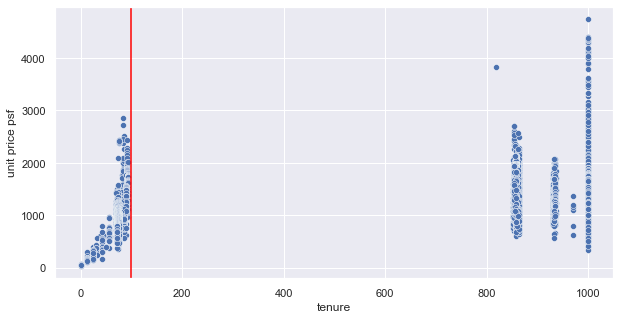

In [107]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = merged_house1['unit price psf'], x = merged_house1['tenure'])
plt.axvline(x=99, color = 'red')

In [108]:
merged_houseP.head()

# dataset 5% removed

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,0,LANDED HOUSING DEVELOPMENT,HOLLAND PARK,999,Resale,1.0,24500000.0,-,14416.0,Land,-,1699.0,May-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,LANDED HOUSING DEVELOPMENT,SWISS CLUB LANE,999,Resale,1.0,24500000.0,-,17558.0,Land,-,1395.0,Jul-2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,LANDED HOUSING DEVELOPMENT,BUKIT TIMAH ROAD,999,Resale,1.0,24480000.0,-,16892.0,Land,-,1449.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,LANDED HOUSING DEVELOPMENT,GALLOP PARK ROAD,999,Resale,1.0,24150000.0,-,15004.0,Land,-,1610.0,Nov-2020,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,LANDED HOUSING DEVELOPMENT,COVE GROVE,86,Resale,1.0,24000000.0,-,9740.0,Land,-,2464.0,Feb-2020,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### To look for private residential property of tenure of 99 years and below

In [109]:
merged_house99 = merged_houseP[merged_houseP['tenure'] <=99]

In [110]:
merged_house99.tail()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
9485,9485,LOYANG VILLAS,LOYANG RISE,71,Resale,1.0,1350000.0,-,1620.0,Land,-,833.0,Mar-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9486,9486,WESTWOOD PARK,WESTWOOD DRIVE,72,Resale,1.0,1350000.0,-,1615.0,Land,-,836.0,Feb-2017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9487,9487,WESTWOOD PARK,WESTWOOD DRIVE,72,Resale,1.0,1350000.0,-,1615.0,Land,-,836.0,Feb-2017,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9488,9488,WESTVILLE,WESTWOOD CRESCENT,72,Resale,1.0,1350000.0,-,1609.0,Land,-,839.0,Feb-2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9489,9489,WESTVILLE,WESTWOOD AVENUE,72,Resale,1.0,1350000.0,-,1612.0,Land,-,837.0,Oct-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [111]:
merged_house99.shape

(1470, 43)

### To look for private residential property of tenure categorize under freehold

In [112]:
freehold = merged_houseP[merged_houseP['tenure'] >=99]

In [113]:
freehold.shape

(8020, 43)

(array([1470.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1208.,
        6812.]),
 array([ 25. , 122.4, 219.8, 317.2, 414.6, 512. , 609.4, 706.8, 804.2,
        901.6, 999. ]),
 <BarContainer object of 10 artists>)

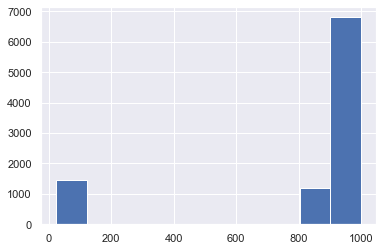

In [114]:
tenure99 = merged_houseP['tenure']

plt.hist(tenure99, bins =10)

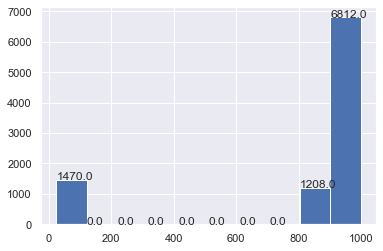

In [115]:
your_bins=10
data= tenure99
arr=plt.hist(data,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

## Modelling for 99 years

In [117]:
X99 = merged_house99.drop(columns = ['price','unit price psf','project name','street name','type of sale','nett price', 'type of area', 'floor level','date of sale', 'index'])
y99 = merged_house99['price']

In [118]:
# Create train/test splits.
X99_train, X99_test, y99_train, y99_test = train_test_split(X99, y99, test_size =0.25, random_state=42)

In [119]:
sc = StandardScaler()
Z99_train = sc.fit_transform(X99_train)
Z99_test = sc.transform(X99_test)

In [120]:
# instantiate the model
lr = LinearRegression()
#fit using the training data
lr.fit(Z99_train, y99_train);

In [121]:
lr.score(Z99_train, y99_train)

0.8988197085546558

In [122]:
lr.score(Z99_test, y99_test)

0.8709498713954753

In [123]:
y_pred99 = lr.predict(Z99_train)
print(metrics.r2_score(y99_train, y_pred99))
print(metrics.mean_squared_error(y99_train, y_pred99))
print(np.sqrt(metrics.mean_squared_error(y99_train, y_pred99)))

0.8988197085546558
837194840762.7898
914983.5193940871


In [124]:
XGB = XGBRegressor()
XGB.fit(Z99_train, y99_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [125]:
def xgb99(search):
    colsample_bytree = search.suggest_float("colsample_bytree", 0.1, 1.0)
    learning_rate = search.suggest_float("learning_rate", 0.1, 1.0) 
    max_depth = search.suggest_int("max_depth",1, 5)
    min_child_weight = search.suggest_int("min_child_weight", 1, 5)
    n_estimator = search.suggest_int("n_estimators", 100, 300)
    reg_lambda = search.suggest_loguniform("reg_lambda", 1e-8, 100)
    reg_alpha = search.suggest_loguniform("reg_alpha", 1e-8, 100)
    sub_sample = search.suggest_float("sub_sample", 0.1, 1.0)
    
    model = XGBRegressor(random_state = 42,
                         colsample_bytree = colsample_bytree,
                         learning_rate = learning_rate,
                         max_depth = max_depth,
                         min_child_weight = min_child_weight,
                         n_estimator = n_estimator,
                         reg_lambda = reg_lambda, 
                         reg_alpha = reg_alpha,
                         sub_sample = sub_sample,
                         n_jobs = -1
                        )
    
    score = cross_val_score(model, Z99_train, y99_train, scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 1)
    mean_score = score.mean()
    std_score = score.std()
    
    accuracy = mean_score - std_score
    
    return accuracy

study = optuna.create_study(direction = 'maximize', sampler = TPESampler(seed =42))
study.optimize(xgb99, n_trials=100)

[I 2021-12-15 02:46:59,168] A new study created in memory with name: no-name-0f58cc8b-f294-4512-9daf-72385debf467
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:46:59,425] Trial 0 finished with value: -1303688.9596784823 and parameters: {'colsample_bytree': 0.4370861069626263, 'learning_rate': 0.9556428757689246, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 131, 'reg_lambda': 3.6303224667798554e-07, 'reg_alpha': 3.809220577048033e-08, 'sub_sample': 0.8795585311974417}. Best is trial 0 with value: -1303688.9596784823.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:46:59,565] Trial 1 finished with value: -1148354.548241986 and parameters: {'colsample_bytree': 0.6410035105688879, 'learning_rate': 0.737265320016441, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 267, 'reg_lambda': 1.3285903900544182e-06, 'reg_alpha': 6.580360277501306e-07, 'sub_sample': 0.2650640588680905}. Best is trial 1 with value: -1148354.548241986.
[Par

[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:46:59,774] Trial 2 finished with value: -1254190.951007745 and parameters: {'colsample_bytree': 0.373818018663584, 'learning_rate': 0.5722807884690141, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 222, 'reg_lambda': 2.4827821051950883e-07, 'reg_alpha': 8.345387083873532e-06, 'sub_sample': 0.4297256589643226}. Best is trial 1 with value: -1148354.548241986.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:46:59,920] Trial 3 finished with value: -1118823.6791972641 and parameters: {'colsample_bytree': 0.5104629857953323, 'learning_rate': 0.8066583652537123, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 219, 'reg_lambda': 2.9140978279786215e-08, 'reg_alpha': 0.011897302909454906, 'sub_sample': 0.2534717113185624}. Best is trial 3 with value: -1118823.6791972641.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:46:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:00,140] Trial 4 finished with value: -1178653.7384909196 and parameters: {'colsample_bytree': 0.1585464336867516, 'learning_rate': 0.9539969835279999, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 161, 'reg_lambda': 9.478096804784244e-08, 'reg_alpha': 0.06955530592645753, 'sub_sample': 0.4961372443656412}. Best is trial 3 with value: -1118823.6791972641.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:00,289] Trial 5 finished with value: -1037396.1540155951 and parameters: {'colsample_bytree': 0.20983441136030095, 'learning_rate': 0.5456592191001431, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 152, 'reg_lambda': 0.042191293826476094, 'reg_alpha': 1.3095158546031483e-05, 'sub_sample': 0.5680612190600297}. Best is trial 5 with value: -1037396.1540155951.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:00,562] Trial 6 finished with value: -1031646.7951491086 and parameters: {'colsample_bytree': 0.5920392514089517, 'learning_rate': 0.26636900997297436, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 288, 'reg_lambda': 8.8771488946556, 'reg_alpha': 0.00952795699161383, 'sub_sample': 0.9296868115208051}. Best is trial 6 with value: -1031646.7951491086.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:00,715] Trial 7 finished with value: -1028549.7731387864 and parameters: {'colsample_bytree': 0.17964325184672755, 'learning_rate': 0.27638457617723067, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 178, 'reg_lambda': 5.169997317292732e-06, 'reg_alpha': 1.9380951355796903, 'sub_sample': 0.4210779940242304}. Best is trial 7 with value: -1028549.7731387864.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:00,865] Trial 8 finished with value: -1043997.9168726435 and parameters: {'colsample_bytree': 0.3528410587186427, 'learning_rate': 0.5884264748424236, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 114, 'reg_lambda': 73.9382838287635, 'reg_alpha': 0.5277736371601186, 'sub_sample': 0

[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:01,047] Trial 9 finished with value: -1131776.1568787543 and parameters: {'colsample_bytree': 0.10496990541124217, 'learning_rate': 0.8339152856093507, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 255, 'reg_lambda': 5.50106171658889e-08, 'reg_alpha': 3.842884090673403e-05, 'sub_sample': 0.20428215357261675}. Best is trial 7 with value: -1028549.7731387864.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:01,257] Trial 10 finished with value: -970121.149196511 and parameters: {'colsample_bytree': 0.9506228898073478, 'learning_rate': 0.10539746466023536, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 184, 'reg_lambda': 6.352279554730473e-05, 'reg_alpha': 51.2114593263111, 'sub_sample': 0.7089151417685019}. Best is trial 10 with value: -970121.149196511.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:01,475] Trial 11 finished with value: -977187.3569206045 and parameters: {'colsample_bytree': 0.9522656887511342, 'learning_rate': 0.10326321505087403, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 187, 'reg_lambda': 9.57440451379871e-05, 'reg_alpha': 86.03488049862476, 'sub_sample': 0.7129901886434187}. Best is trial 10 with value: -970121.149196511.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:01,692] Trial 12 finished with value: -968739.0253125984 and parameters: {'colsample_bytree': 0.9949059251685877, 'learning_rate': 0.10373517481763485, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 191, 'reg_lambda': 0.00016405351446525365, 'reg_alpha': 93.70177553957353, 'sub_sample': 0.7321091360895119}. Best is trial 12 with value: -968739.0253125984.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:01,883] Trial 13 finished with value: -991213.9250029927 and parameters: {'colsample_bytree': 0.9923889994877089, 'learning_rate': 0.13022729644102515, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 218, 'reg_lambda': 0.0017880595475797878, 'reg_alpha': 98.54268387927638, 'sub_sample': 0.7192866038154434}. Best is trial 12 with value: -968739.0253125984.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:02,100] Trial 14 finished with value: -1109541.2869510343 and parameters: {'colsample_bytree': 0.8047400065328008, 'learning_rate': 0.31236894148256517, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 191, 'reg_lambda': 0.0020668656591426885, 'reg_alpha': 4.555344018569671, 'sub_sample': 0.7575029099166869}. Best is trial 12 with value: -968739.0253125984.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:02,354] Trial 15 finished with value: -1153316.2265640548 and parameters: {'colsample_bytree': 0.8169129273301083, 'learning_rate': 0.3785650565789229, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 151, 'reg_lambda': 4.728996459359038e-05, 'reg_alpha': 9.533401203242635, 'sub_sample': 0.6146937019752923}. Best is trial 12 with value: -968739.0253125984.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:02,562] Trial 16 finished with value: -1009867.2416487783 and parameters: {'colsample_bytree': 0.8303337242530464, 'learning_rate': 0.18955361538768806, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 237, 'reg_lambda': 0.073867417029219, 'reg_alpha': 0.1700633706522627, 'sub_sample': 0.8450085335117865}. Best is trial 12 with value: -968739.0253125984.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:02,802] Trial 17 finished with value: -1180210.868981339 and parameters: {'colsample_bytree': 0.7039253366568207, 'learning_rate': 0.40646081511251253, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'reg_lambda': 4.1118943441321995e-05, 'reg_alpha': 0.0012630137971814312, 'sub_sample': 0.9705750164484441}. Best is trial 12 with value: -968739.0253125984.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:03,046] Trial 18 finished with value: -1025921.5168279943 and parameters: {'colsample_bytree': 0.9163453050674848, 'learning_rate': 0.1879373060378221, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 168, 'reg_lambda': 0.03444261827537107, 'reg_alpha': 15.539578356366503, 'sub_sample': 0.6524349833661232}. Best is trial 12 with value: -968739.0253125984.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:03,253] Trial 19 finished with value: -1192282.0027382518 and parameters: {'colsample_bytree': 0.8868086011496393, 'learning_rate': 0.42971306230222384, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 0.0002777774723980318, 'reg_alpha': 0.8178215064110765, 'sub_sample': 0.7918577875483472}. Best is trial 12 with value: -968739.0253125984.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:03,523] Trial 20 finished with value: -1144995.1167255586 and parameters: {'colsample_bytree': 0.6967457638928767, 'learning_rate': 0.2018210975135883, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 130, 'reg_lambda': 5.615186600271202e-06, 'reg_alpha': 0.00029054946794909085, 'sub_sample': 0.6693673534860864}. Best is trial 12 with value: -968739.0253125984.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:03,723] Trial 21 finished with value: -981288.2461258237 and parameters: {'colsample_bytree': 0.999364410961595, 'learning_rate': 0.1184058281278102, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 192, 'reg_lambda': 0.00019483845939341794, 'reg_alpha': 98.23507154287418, 'sub_sample': 0.7987811512893093}. Best is trial 12 with value: -968739.0253125984.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:03,922] Trial 22 finished with value: -965184.7062366061 and parameters: {'colsample_bytree': 0.9336598354830954, 'learning_rate': 0.11045886546479783, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 177, 'reg_lambda': 0.004981341068377884, 'reg_alpha': 20.712790524283363, 'sub_sample': 0.7061888875781689}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:04,117] Trial 23 finished with value: -1084110.220548477 and parameters: {'colsample_bytree': 0.8765611601305328, 'learning_rate': 0.2185656281808594, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 177, 'reg_lambda': 0.005966716051930677, 'reg_alpha': 7.964436299891413, 'sub_sample': 

[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:04,350] Trial 24 finished with value: -1140383.1249132056 and parameters: {'colsample_bytree': 0.7392963135224717, 'learning_rate': 0.33371508125247457, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 209, 'reg_lambda': 0.2359251144666711, 'reg_alpha': 12.725831615527703, 'sub_sample': 0.6090455941425472}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:04,549] Trial 25 finished with value: -1188193.6151853402 and parameters: {'colsample_bytree': 0.9193157030556931, 'learning_rate': 0.47283716310954826, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 139, 'reg_lambda': 0.7243223704233251, 'reg_alpha': 0.4493109466463747, 'sub_sample': 0.8521002982957653}. Best is trial 22 with value: -965184.7062366061.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:04,782] Trial 26 finished with value: -1003504.1903339812 and parameters: {'colsample_bytree': 0.7791139702334795, 'learning_rate': 0.15697456819819242, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 238, 'reg_lambda': 0.007459233134914333, 'reg_alpha': 0.03326120555589132, 'sub_sample': 0.698324494562202}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:04,997] Trial 27 finished with value: -1100176.9645183124 and parameters: {'colsample_bytree': 0.8721356591387294, 'learning_rate': 0.2519445781511266, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 169, 'reg_lambda': 8.615421271874135e-06, 'reg_alpha': 27.502803835623997, 'sub_sample': 0.4492076026094094}. Best is trial 22 with value: -965184.7062366061.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:05,146] Trial 28 finished with value: -1071040.9584636185 and parameters: {'colsample_bytree': 0.9580810625040963, 'learning_rate': 0.10023590107424163, 'max_depth': 1, 'min_child_weight': 4, 'n_estimators': 205, 'reg_lambda': 0.0010323714744715072, 'reg_alpha': 1.8698039041266292, 'sub_sample': 0.12279573575101221}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:05,389] Trial 29 finished with value: -1108963.5770382194 and parameters: {'colsample_bytree': 0.5268621721120837, 'learning_rate': 0.32475743878908947, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 138, 'reg_lambda': 8.913620388298943e-07, 'reg_alpha': 4.448996188984284e-07, 'sub_sample': 0.8986188774130864}. Best is trial 22 with value: -965184.7062366061.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:05,599] Trial 30 finished with value: -1248180.073641343 and parameters: {'colsample_bytree': 0.7561189671069446, 'learning_rate': 0.6485441231867455, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 235, 'reg_lambda': 0.00031156974557194884, 'reg_alpha': 2.67578861029397e-08, 'sub_sample': 0.772457411489397}. Best is trial 22 with value: -965184.7062366061.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:05,803] Trial 31 finished with value: -996968.3997775307 and parameters: {'colsample_bytree': 0.9524940810882435, 'learning_rate': 0.11193850617804973, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 185, 'reg_lambda': 4.9362262062937505e-05, 'reg_alpha': 88.56562896697625, 'sub_sample': 0.7315913318422244}. Best is trial 22 with value: -965184.7062366061.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:05,998] Trial 32 finished with value: -1009286.7874653578 and parameters: {'colsample_bytree': 0.994591259507278, 'learning_rate': 0.1734723568952976, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 196, 'reg_lambda': 1.9210333174296594e-05, 'reg_alpha': 35.913970533055675, 'sub_sample': 0.6314876332759172}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:06,175] Trial 33 finished with value: -1113788.7904720225 and parameters: {'colsample_bytree': 0.8563109644001025, 'learning_rate': 0.2352454300473092, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 178, 'reg_lambda': 0.0001460883939124586, 'reg_alpha': 2.9208584986547192, 'sub_sample': 0.8206534872580858}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:06,395] Trial 34 finished with value: -1022097.328415048 and parameters: {'colsample_bytree': 0.9290300078752066, 'learning_rate': 0.15152779876273387, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 156, 'reg_lambda': 1.6855508471475844e-06, 'reg_alpha': 40.08142357185771, 'sub_sample': 0.6908013178671415}. Best is trial 22 with value: -965184.7062366061.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:06,564] Trial 35 finished with value: -1091854.5788551962 and parameters: {'colsample_bytree': 0.6481005883563646, 'learning_rate': 0.1046378550555239, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 214, 'reg_lambda': 0.011355322600438492, 'reg_alpha': 0.14114901236400484, 'sub_sample': 0.5636376320865897}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:06,777] Trial 36 finished with value: -1231083.711926481 and parameters: {'colsample_bytree': 0.4048105270490113, 'learning_rate': 0.9833809984295638, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 166, 'reg_lambda': 0.0005932883325403595, 'reg_alpha': 4.6956310169100535, 'sub_sample': 0.8907350098542048}. Best is trial 22 with value: -965184.7062366061.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:06,950] Trial 37 finished with value: -1061114.017304494 and parameters: {'colsample_bytree': 0.3206185109329741, 'learning_rate': 0.2789227274296371, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 229, 'reg_lambda': 4.5842731505690787e-07, 'reg_alpha': 26.427682292341242, 'sub_sample': 0.7448066429222693}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alar

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:07,170] Trial 38 finished with value: -1066858.6849180728 and parameters: {'colsample_bytree': 0.9504427011085503, 'learning_rate': 0.22192500552200756, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 185, 'reg_lambda': 1.0633582693547669e-08, 'reg_alpha': 2.4208801196017427e-07, 'sub_sample': 0.6100935211556896}. Best is trial 22 with value: -965184.7062366061.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:07,408] Trial 39 finished with value: -1214375.446268392 and parameters: {'colsample_bytree': 0.5793390813812216, 'learning_rate': 0.49826417252379696, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 250, 'reg_lambda': 8.852173240871603e-05, 'reg_alpha': 0.004758990872623961, 'sub_sample': 0.9984162570205871}. Best is trial 22 with value: -965184.7062366061.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:07,580] Trial 40 finished with value: -1163761.0482576536 and parameters: {'colsample_bytree': 0.4756824830560836, 'learning_rate': 0.9000090257701696, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 203, 'reg_lambda': 0.0031940071526177036, 'reg_alpha': 1.5714918392023272, 'sub_sample': 0.37428233723633575}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:07,802] Trial 41 finished with value: -1012577.2088234778 and parameters: {'colsample_bytree': 0.9985098416235477, 'learning_rate': 0.146103705611066, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 190, 'reg_lambda': 0.00045338249314455753, 'reg_alpha': 96.7205485894752, 'sub_sample': 0.802928000970837}. Best is trial 22 with value: -965184.7062366061.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:08,024] Trial 42 finished with value: -1018662.700074231 and parameters: {'colsample_bytree': 0.8967807619191479, 'learning_rate': 0.14769099046275136, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 297, 'reg_lambda': 1.7480305712850134e-05, 'reg_alpha': 55.43303702940878, 'sub_sample': 0.6952796566071218}. Best is trial 22 with value: -965184.7062366061.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:08,239] Trial 43 finished with value: -974229.8694559212 and parameters: {'colsample_bytree': 0.9644987144045843, 'learning_rate': 0.10486310402667699, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 175, 'reg_lambda': 0.00020780179714045155, 'reg_alpha': 22.901420441517892, 'sub_sample': 0.9276326407858113}. Best is trial 22 with value: -965184.7062366061.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:08,453] Trial 44 finished with value: -1277151.3187345946 and parameters: {'colsample_bytree': 0.8325894765139927, 'learning_rate': 0.7358258225007954, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 148, 'reg_lambda': 0.0009716676244698446, 'reg_alpha': 13.32757873926491, 'sub_sample': 0.9374937160760303}. Best is trial 22 with value: -965184.7062366061.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:08,634] Trial 45 finished with value: -1117108.0687012598 and parameters: {'colsample_bytree': 0.941623449054068, 'learning_rate': 0.279974735739307, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 175, 'reg_lambda': 4.585548332869627e-06, 'reg_alpha': 0.34169975636041133, 'sub_sample': 0.8332611974525583}. Best is trial 22 with value: -965184.7062366061.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:08,849] Trial 46 finished with value: -958133.9270655317 and parameters: {'colsample_bytree': 0.8472378538697491, 'learning_rate': 0.18319795772899525, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 162, 'reg_lambda': 0.026350620082629762, 'reg_alpha': 4.469345041533071, 'sub_sample': 0.5137204639116605}. Best is trial 46 with value: -958133.9270655317.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:09,101] Trial 47 finished with value: -1003307.8552866427 and parameters: {'colsample_bytree': 0.7956017681635603, 'learning_rate': 0.1804404049484994, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 163, 'reg_lambda': 3.5503096137464527, 'reg_alpha': 4.613262767493055, 'sub_sample': 0.5111481068920773}. Best is trial 46 with value: -958133.9270655317.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:09,426] Trial 48 finished with value: -1221897.3319275284 and parameters: {'colsample_bytree': 0.8496558437143915, 'learning_rate': 0.23982115013325017, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 144, 'reg_lambda': 0.021633046926611596, 'reg_alpha': 0.9715705558175196, 'sub_sample': 0.3520890262114851}. Best is trial 46 with value: -958133.9270655317.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:09,652] Trial 49 finished with value: -1035973.3536812752 and parameters: {'colsample_bytree': 0.8991270304890969, 'learning_rate': 0.35007607853105915, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 126, 'reg_lambda': 0.31678276168044683, 'reg_alpha': 0.030340716681734874, 'sub_sample': 0.472097799576581}. Best is trial 46 with value: -958133.9270655317.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:09,976] Trial 50 finished with value: -1192232.5902564758 and parameters: {'colsample_bytree': 0.9582237167817955, 'learning_rate': 0.19372640747992298, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 156, 'reg_lambda': 0.0036592306437954274, 'reg_alpha': 16.374451606362804, 'sub_sample': 0.5806474197839626}. Best is trial 46 with value: -958133.9270655317.


[02:47:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:10,229] Trial 51 finished with value: -994104.7348735475 and parameters: {'colsample_bytree': 0.9639917608608892, 'learning_rate': 0.1394100451676005, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 183, 'reg_lambda': 0.11431004369005572, 'reg_alpha': 7.066067459532502, 'sub_sample': 0.6624259676949688}. Best is trial 46 with value: -958133.9270655317.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:10,478] Trial 52 finished with value: -998238.3923177811 and parameters: {'colsample_bytree': 0.9026811207180849, 'learning_rate': 0.1344646005020806, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 172, 'reg_lambda': 8.071547169508782e-05, 'reg_alpha': 32.12291831382358, 'sub_sample': 0.7616579629475179}. Best is trial 46 with value: -958133.9270655317.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:10,682] Trial 53 finished with value: -975123.4899560661 and parameters: {'colsample_bytree': 0.9729181408255357, 'learning_rate': 0.107616101115209, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 159, 'reg_lambda': 0.0016411278720394188, 'reg_alpha': 3.070910352242025, 'sub_sample': 0.5455528273153745}. Best is trial 46 with value: -958133.9270655317.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:10,913] Trial 54 finished with value: -944243.6231200908 and parameters: {'colsample_bytree': 0.25701962711362963, 'learning_rate': 0.10112287788629254, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 158, 'reg_lambda': 0.019816072889508575, 'reg_alpha': 9.320645864441838e-05, 'sub_sample': 0.48775759803723817}. Best is trial 54 with value: -944243.6231200908.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:11,111] Trial 55 finished with value: -1037633.2821176123 and parameters: {'colsample_bytree': 0.10209736792593241, 'learning_rate': 0.20694113512945572, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 123, 'reg_lambda': 0.01888725858832616, 'reg_alpha': 7.8118803035183e-05, 'sub_sample': 0.39012826254603894}. Best is trial 54 with value: -944243.6231200908.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:11,339] Trial 56 finished with value: -991205.3951905086 and parameters: {'colsample_bytree': 0.19624751061705786, 'learning_rate': 0.16914509704026973, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 178, 'reg_lambda': 0.08311523310141959, 'reg_alpha': 2.004716867624731e-05, 'sub_sample': 0.4779853958476467}. Best is trial 54 with value: -944243.6231200908.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:11,533] Trial 57 finished with value: -988717.3247892242 and parameters: {'colsample_bytree': 0.322814908816876, 'learning_rate': 0.2861749070542461, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 197, 'reg_lambda': 1.44191401516067, 'reg_alpha': 0.00027823839237483823, 'sub_sample': 0.5834870916935022}. Best is trial 54 with value: -944243.6231200908.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:11,758] Trial 58 finished with value: -935703.4921656486 and parameters: {'colsample_bytree': 0.6432243925161454, 'learning_rate': 0.17098502963746232, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 161, 'reg_lambda': 0.04191538136236904, 'reg_alpha': 1.7925921501612227e-06, 'sub_sample': 0.3339073360976403}. Best is trial 58 with value: -935703.4921656486.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:11,970] Trial 59 finished with value: -1009473.5885262846 and parameters: {'colsample_bytree': 0.23159090641002256, 'learning_rate': 0.25168803061035483, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 138, 'reg_lambda': 0.05747957824759911, 'reg_alpha': 4.912646726806373e-06, 'sub_sample': 0.26115610869055195}. Best is trial 58 with value: -935703.4921656486.


[02:47:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:12,167] Trial 60 finished with value: -935791.2670455037 and parameters: {'colsample_bytree': 0.6250689248283179, 'learning_rate': 0.20451553294689556, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 148, 'reg_lambda': 0.1536699767500635, 'reg_alpha': 1.95283016663034e-06, 'sub_sample': 0.3299857057264577}. Best is trial 58 with value: -935703.4921656486.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:12,361] Trial 61 finished with value: -921781.472530791 and parameters: {'colsample_bytree': 0.6822141774304485, 'learning_rate': 0.17492375304343588, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150, 'reg_lambda': 0.20216009354295592, 'reg_alpha': 1.623873638059635e-06, 'sub_sample

[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:12,552] Trial 62 finished with value: -956184.5724111437 and parameters: {'colsample_bytree': 0.6318228214479449, 'learning_rate': 0.2078746135771796, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 117, 'reg_lambda': 0.1595169106076155, 'reg_alpha': 4.339375112842808e-06, 'sub_sample': 0.20738761322659272}. Best is trial 61 with value: -921781.472530791.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:12,770] Trial 63 finished with value: -910794.2729013191 and parameters: {'colsample_bytree': 0.6271299530046192, 'learning_rate': 0.2034955668756416, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 102, 'reg_lambda': 25.674358362835136, 'reg_alpha': 2.4043875916716258e-06, 'sub_sample': 0.31585542318673493}. Best is trial 63 with value: -910794.2729013191.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:12,986] Trial 64 finished with value: -994692.1082128375 and parameters: {'colsample_bytree': 0.6355879005837529, 'learning_rate': 0.3725495059002999, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 110, 'reg_lambda': 6.757081617268642, 'reg_alpha': 2.765464175760309e-06, 'sub_sample': 0.21283034731806416}. Best is trial 63 with value: -910794.2729013191.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:13,178] Trial 65 finished with value: -953354.906690474 and parameters: {'colsample_bytree': 0.6330961649264732, 'learning_rate': 0.31007846336335176, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 116, 'reg_lambda': 81.06498189310244, 'reg_alpha': 8.565118177767462e-08, 'sub_sample': 0.3449983273584789}. Best is trial 63 with value: -910794.2729013191.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:13,352] Trial 66 finished with value: -1064494.8749795663 and parameters: {'colsample_bytree': 0.6269677377270102, 'learning_rate': 0.2959053057841966, 'max_depth': 1, 'min_child_weight': 4, 'n_estimators': 102, 'reg_lambda': 94.64423658496504, 'reg_alpha': 9.026656251793875e-08, 'sub_sample': 0.3148843670936686}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:13,549] Trial 67 finished with value: -911801.9001178856 and parameters: {'colsample_bytree': 0.6820496528843778, 'learning_rate': 0.23073924402674276, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 117, 'reg_lambda': 19.11915027466102, 'reg_alpha': 1.6580450385868964e-06, 'sub_sample': 0.22349680137759503}. Best is trial 63 with value: -910794.2729013191.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:13,757] Trial 68 finished with value: -960967.4589008393 and parameters: {'colsample_bytree': 0.6856416884691184, 'learning_rate': 0.26294701401435655, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 109, 'reg_lambda': 32.778789043573866, 'reg_alpha': 2.0111171458184023e-06, 'sub_sample': 0.3016403584569908}. Best is trial 63 with value: -910794.2729013191.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:13,976] Trial 69 finished with value: -922522.6403113027 and parameters: {'colsample_bytree': 0.5825013645355005, 'learning_rate': 0.3174173490530685, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 132, 'reg_lambda': 28.119552214992336, 'reg_alpha': 9.789397563557412e-07, 'sub_sample': 0.1462545356484569}. Best is trial 63 with value: -910794.2729013191.


[02:47:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:14,213] Trial 70 finished with value: -961033.4226976341 and parameters: {'colsample_bytree': 0.5888946441007817, 'learning_rate': 0.23100967193993863, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 136, 'reg_lambda': 22.573366931336142, 'reg_alpha': 1.0440337146162483e-08, 'sub_sample': 0.17499222223716876}. Best is trial 63 with value: -910794.2729013191.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:14,418] Trial 71 finished with value: -922490.4550085753 and parameters: {'colsample_bytree': 0.5550020151270237, 'learning_rate': 0.3569665787519851, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 130, 'reg_lambda': 29.7093528603272, 'reg_alpha': 1.0139743743009755e-06, 'sub_sample': 0.24003504758158387}. Best is trial 63 with value: -910794.2729013191.



[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:14,634] Trial 72 finished with value: -939068.4110608294 and parameters: {'colsample_bytree': 0.5349722938578199, 'learning_rate': 0.4243016107584754, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 131, 'reg_lambda': 29.564641465272043, 'reg_alpha': 8.916777419366309e-07, 'sub_sample': 0.12744567471061874}. Best is trial 63 with value: -910794.2729013191.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:14,836] Trial 73 finished with value: -923722.2592891052 and parameters: {'colsample_bytree': 0.5564765190044603, 'learning_rate': 0.4104589767796307, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 127, 'reg_lambda': 26.680071099520376, 'reg_alpha': 9.792099272465099e-07, 'sub_sample': 0.10608426927798753}. Best is trial 63 with value: -910794.2729013191.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:15,040] Trial 74 finished with value: -947533.4122004678 and parameters: {'colsample_bytree': 0.5631199528843192, 'learning_rate': 0.36456192003571464, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 123, 'reg_lambda': 13.355944013808916, 'reg_alpha': 1.0098269247929422e-06, 'sub_sample': 0.17045592425369704}. Best is trial 63 with value: -910794.2729013191.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:15,244] Trial 75 finished with value: -991117.5248283048 and parameters: {'colsample_bytree': 0.6671392734133814, 'learning_rate': 0.4066358107822792, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 145, 'reg_lambda': 3.3613094062377487, 'reg_alpha': 1.1706542719386841e-05, 'sub_sample': 0.1073540893261964}. Best is trial 63 with value: -910794.2729013191.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:15,439] Trial 76 finished with value: -981327.3567990573 and parameters: {'colsample_bytree': 0.4752929059564187, 'learning_rate': 0.3265317284059811, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 131, 'reg_lambda': 1.093051902631798, 'reg_alpha': 3.521421315018482e-07, 'sub_sample': 0.22952892062931768}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[I 2021-12-15 02:47:15,613] Trial 77 finished with value: -1114831.702334985 and parameters: {'colsample_bytree': 0.7226435453541494, 'learning_rate': 0.5318855184053988, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 107, 'reg_lambda': 6.236786658072333, 'reg_alpha': 1.608822714892556e-06, 'sub_sample':

[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:15,827] Trial 78 finished with value: -913600.4500229532 and parameters: {'colsample_bytree': 0.6087814901329865, 'learning_rate': 0.34529985268070185, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 117, 'reg_lambda': 43.34494756021437, 'reg_alpha': 1.557627520486936e-07, 'sub_sample': 0.23905405292329462}. Best is trial 63 with value: -910794.2729013191.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:16,037] Trial 79 finished with value: -928129.2481961697 and parameters: {'colsample_bytree': 0.6015480730648712, 'learning_rate': 0.4573127426469876, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 121, 'reg_lambda': 37.56654246486239, 'reg_alpha': 1.73975141345485e-07, 'sub_sample': 0.15613270508531701}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:16,243] Trial 80 finished with value: -948427.0046512231 and parameters: {'colsample_bytree': 0.5008558681263219, 'learning_rate': 0.4726402164256919, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 120, 'reg_lambda': 43.332865105020026, 'reg_alpha': 1.5830212240119943e-07, 'sub_sample': 0.15636245300105667}. Best is trial 63 with value: -910794.2729013191.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:16,444] Trial 81 finished with value: -965083.9248944271 and parameters: {'colsample_bytree': 0.5992809352570638, 'learning_rate': 0.4610256605855253, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 112, 'reg_lambda': 14.895543970982292, 'reg_alpha': 6.748191908140478e-07, 'sub_sample': 0.24896018085401703}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:16,666] Trial 82 finished with value: -914601.5946986866 and parameters: {'colsample_bytree': 0.5579418314057978, 'learning_rate': 0.3936632217293407, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 104, 'reg_lambda': 52.256173575732525, 'reg_alpha': 1.6180656587484207e-07, 'sub_sampl

[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:16,846] Trial 83 finished with value: -913909.5187562929 and parameters: {'colsample_bytree': 0.5601014066400348, 'learning_rate': 0.39607754172572684, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 101, 'reg_lambda': 50.12376040575236, 'reg_alpha': 4.69520204343596e-08, 'sub_sample': 0.1453753525345931}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:17,065] Trial 84 finished with value: -977227.0778251562 and parameters: {'colsample_bytree': 0.5568663107336697, 'learning_rate': 0.38252872861055925, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 102, 'reg_lambda': 3.1374022729133175, 'reg_alpha': 3.267813421388073e-08, 'sub_sample': 0.18763144643322804}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:17,264] Trial 85 finished with value: -927255.5463101092 and parameters: {'colsample_bytree': 0.513454062027943, 'learning_rate': 0.39857569058111786, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 105, 'reg_lambda': 53.156259536211316, 'reg_alpha': 6.559096963256885e-08, 'sub_sample': 0.13293958018619356}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:17,464] Trial 86 finished with value: -949581.4316072608 and parameters: {'colsample_bytree': 0.6769073529029538, 'learning_rate': 0.3444035358410104, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 114, 'reg_lambda': 11.554320462506718, 'reg_alpha': 4.138333678523609e-07, 'sub_sample': 0.23472584644725206}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:17,648] Trial 87 finished with value: -1019698.6689230351 and parameters: {'colsample_bytree': 0.43685487231278036, 'learning_rate': 0.5975430630127471, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 127, 'reg_lambda': 7.406250859271541, 'reg_alpha': 4.921315921729138e-06, 'sub_sample': 0.1050457791693268}. Best is trial 63 with value: -910794.2729013191.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:17,898] Trial 88 finished with value: -991294.1997028409 and parameters: {'colsample_bytree': 0.7090644341154992, 'learning_rate': 0.30734192065696253, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 135, 'reg_lambda': 21.116612508508418, 'reg_alpha': 2.0057957385046897e-08, 'sub_sample': 0.14580830426801858}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:18,099] Trial 89 finished with value: -929385.204794831 and parameters: {'colsample_bytree': 0.540460117729724, 'learning_rate': 0.4391799097797339, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 100, 'reg_lambda': 57.686352080554386, 'reg_alpha': 5.680808281589834e-08, 'sub_sample': 0.1851179326385876}. Best is trial 63 with value: -910794.2729013191.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:18,296] Trial 90 finished with value: -954492.9870729587 and parameters: {'colsample_bytree': 0.5707914191514077, 'learning_rate': 0.5077073383434597, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 119, 'reg_lambda': 17.706657666660348, 'reg_alpha': 2.3358684354607097e-07, 'sub_sample': 0.2735165769922813}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:18,496] Trial 91 finished with value: -925891.4754308693 and parameters: {'colsample_bytree': 0.5133568104012682, 'learning_rate': 0.40846037919583106, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 106, 'reg_lambda': 54.51909641329195, 'reg_alpha': 9.587454175697577e-08, 'sub_sample': 0.13724612056242172}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:18,705] Trial 92 finished with value: -982417.1463710815 and parameters: {'colsample_bytree': 0.48654469789136, 'learning_rate': 0.409549582218374, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 106, 'reg_lambda': 5.367117242640626, 'reg_alpha': 1.276748837254211e-07, 'sub_sample': 0.22312309056800977}. Best is trial 63 with value: -910794.2729013191.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:18,906] Trial 93 finished with value: -890859.6498853203 and parameters: {'colsample_bytree': 0.45748459702696453, 'learning_rate': 0.3564163163650624, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 113, 'reg_lambda': 96.82134261381884, 'reg_alpha': 5.89648243122841e-07, 'sub_sample': 0.1921355475617525}. Best is trial 93 with value: -890859.6498853203.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:19,109] Trial 94 finished with value: -898391.0948779164 and parameters: {'colsample_bytree': 0.612150195253353, 'learning_rate': 0.34678767718170744, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 126, 'reg_lambda': 97.12695873373049, 'reg_alpha': 5.709753318754853e-07, 'sub_sample': 0.19485274198017338}. Best is trial 93 with value: -890859.6498853203.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:19,316] Trial 95 finished with value: -989190.9973621949 and parameters: {'colsample_bytree': 0.6049634739915806, 'learning_rate': 0.3488144602386217, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 110, 'reg_lambda': 2.1490177791914142, 'reg_alpha': 4.555990570218843e-07, 'sub_sample': 0.19452708420035242}. Best is trial 93 with value: -890859.6498853203.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:19,517] Trial 96 finished with value: -886126.2696653896 and parameters: {'colsample_bytree': 0.4537227956890705, 'learning_rate': 0.38062328360508757, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 114, 'reg_lambda': 98.50496221182014, 'reg_alpha': 2.627612568931799e-05, 'sub_sample': 0.29247622718631694}. Best is trial 96 with value: -886126.2696653896.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:19,711] Trial 97 finished with value: -895330.5654074524 and parameters: {'colsample_bytree': 0.39009306677974714, 'learning_rate': 0.384118977685431, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 116, 'reg_lambda': 95.6905520160292, 'reg_alpha': 1.1529661729025654e-05, 'sub_sample': 0.2437350855406347}. Best is trial 96 with value: -886126.2696653896.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:19,992] Trial 98 finished with value: -900261.7200291354 and parameters: {'colsample_bytree': 0.38835279176821913, 'learning_rate': 0.38440655268390067, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 113, 'reg_lambda': 87.84375797621271, 'reg_alpha': 1.8867771879616167e-05, 'sub_sample': 0.29180435151488615}. Best is trial 96 with value: -886126.2696653896.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:20,270] Trial 99 finished with value: -905809.1751385429 and parameters: {'colsample_bytree': 0.4019060095341558, 'learning_rate': 0.33215337562502967, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 114, 'reg_lambda': 73.78167593122436, 'reg_alpha': 2.5835092848074036e-05, 'sub_sample': 0.2829570228385517}. Best is trial 96 with value: -886126.2696653896.


In [126]:
study.best_params

{'colsample_bytree': 0.4537227956890705,
 'learning_rate': 0.38062328360508757,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimators': 114,
 'reg_lambda': 98.50496221182014,
 'reg_alpha': 2.627612568931799e-05,
 'sub_sample': 0.29247622718631694}

In [127]:
study.best_trial.value

-886126.2696653896

In [128]:
XGB99 = XGBRegressor(colsample_bytree=  0.4537227956890705, learning_rate= 0.38062328360508757, max_depth= 2 , min_child_weight= 3, n_estimators= 114,
reg_alpha= 2.627612568931799e-05, reg_lambda= 98.50496221182014, sub_sample=  0.29247622718631694)
XGB99.fit(Z99_train, y99_train)

[02:47:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4537227956890705,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.38062328360508757,
             max_delta_step=0, max_depth=2, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=114, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=2.627612568931799e-05, reg_lambda=98.50496221182014,
             scale_pos_weight=1, sub_sample=0.29247622718631694, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
XGB99.score(Z99_train, y99_train)

0.9385178937858623

In [130]:
XGB99.score(Z99_test, y99_test)

0.9180282577894779

In [131]:
y_pred99 = XGB99.predict(Z99_train)
print(metrics.r2_score(y99_train, y_pred99))
print(metrics.mean_squared_error(y99_train, y_pred99))
print(np.sqrt(metrics.mean_squared_error(y99_train, y_pred99)))

0.9385178937858623
508720635080.5041
713246.5457893953


In [132]:
merged_house99['price'].mean()

2832717.612244898

In [133]:
freehold.head()

,index,project name,street name,tenure,type of sale,no. of units,price,nett price,areasq,type of area,floor level,unit price psf,date of sale,market segment_CCR,market segment_OCR,market segment_RCR,postal district_2.0,postal district_3.0,postal district_4.0,postal district_5.0,postal district_8.0,postal district_9.0,postal district_10.0,postal district_11.0,postal district_12.0,postal district_13.0,postal district_14.0,postal district_15.0,postal district_16.0,postal district_17.0,postal district_18.0,postal district_19.0,postal district_20.0,postal district_21.0,postal district_22.0,postal district_23.0,postal district_25.0,postal district_26.0,postal district_27.0,postal district_28.0,type_Detached,type_Semi-detached,type_Terrace
0,0,LANDED HOUSING DEVELOPMENT,HOLLAND PARK,999,Resale,1.0,24500000.0,-,14416.0,Land,-,1699.0,May-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,LANDED HOUSING DEVELOPMENT,SWISS CLUB LANE,999,Resale,1.0,24500000.0,-,17558.0,Land,-,1395.0,Jul-2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,LANDED HOUSING DEVELOPMENT,BUKIT TIMAH ROAD,999,Resale,1.0,24480000.0,-,16892.0,Land,-,1449.0,Jul-2021,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,LANDED HOUSING DEVELOPMENT,GALLOP PARK ROAD,999,Resale,1.0,24150000.0,-,15004.0,Land,-,1610.0,Nov-2020,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,6,LANDED HOUSING DEVELOPMENT,GARLICK AVENUE,999,Resale,1.0,23880000.0,-,27829.0,Land,-,858.0,Feb-2017,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [134]:
XFH = freehold.drop(columns = ['price','unit price psf','project name','street name','type of sale','nett price', 'type of area', 'floor level','date of sale', 'index'])
yFH = freehold['price']

In [135]:
# Create train/test splits.
XFH_train, XFH_test, yFH_train, yFH_test = train_test_split(XFH, yFH, test_size =0.25, random_state=42)

In [136]:
sc = StandardScaler()
ZFH_train = sc.fit_transform(XFH_train)
ZFH_test = sc.transform(XFH_test)

In [137]:
lr.fit(ZFH_train, yFH_train)

LinearRegression()

In [138]:
lr.score(ZFH_train, yFH_train)

0.8669688086219653

In [139]:
lr.score(ZFH_test, yFH_test)

0.8585749612370516

In [140]:
y_predFH = lr.predict(ZFH_train)
print(metrics.r2_score(yFH_train, y_predFH))
print(metrics.mean_squared_error(yFH_train, y_predFH))
print(np.sqrt(metrics.mean_squared_error(yFH_train, y_predFH)))

0.8669688086219653
1129355873528.754
1062711.566479237


In [141]:
XGB = XGBRegressor()
XGB.fit(ZFH_train, yFH_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [142]:
def xgbFH(search):
    colsample_bytree = search.suggest_float("colsample_bytree", 0.1, 1.0)
    learning_rate = search.suggest_float("learning_rate", 0.1, 1.0) 
    max_depth = search.suggest_int("max_depth",1, 5)
    min_child_weight = search.suggest_int("min_child_weight", 1, 5)
    n_estimator = search.suggest_int("n_estimators", 100, 300)
    reg_lambda = search.suggest_loguniform("reg_lambda", 1e-8, 100)
    reg_alpha = search.suggest_loguniform("reg_alpha", 1e-8, 100)
    sub_sample = search.suggest_float("sub_sample", 0.1, 1.0)
    
    model = XGBRegressor(random_state = 42,
                         colsample_bytree = colsample_bytree,
                         learning_rate = learning_rate,
                         max_depth = max_depth,
                         min_child_weight = min_child_weight,
                         n_estimator = n_estimator,
                         reg_lambda = reg_lambda, 
                         reg_alpha = reg_alpha,
                         sub_sample = sub_sample,
                         n_jobs = -1
                        )
    
    score = cross_val_score(model, ZFH_train, yFH_train, scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 1)
    mean_score = score.mean()
    std_score = score.std()
    
    accuracy = mean_score - std_score
    
    return accuracy

study = optuna.create_study(direction = 'maximize', sampler = TPESampler(seed =42))
study.optimize(xgbFH, n_trials=100)

[I 2021-12-15 02:47:45,279] A new study created in memory with name: no-name-16ef058e-69da-4519-ab34-7c2a3a14071a
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:47:45,772] Trial 0 finished with value: -1195273.9451806599 and parameters: {'colsample_bytree': 0.4370861069626263, 'learning_rate': 0.9556428757689246, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 131, 'reg_lambda': 3.6303224667798554e-07, 'reg_alpha': 3.809220577048033e-08, 'sub_sample': 0.8795585311974417}. Best is trial 0 with value: -1195273.9451806599.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:46,078] Trial 1 finished with value: -1137107.5824150909 and parameters: {'colsample_bytree': 0.6410035105688879, 'learning_rate': 0.737265320016441, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 267, 'reg_lambda': 1.3285903900544182e-06, 'reg_alpha': 6.580360277501306e-07, 'sub_sample': 0.2650640588680905}. Best is trial 1 with value: -1137107.5824150909.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:46,473] Trial 2 finished with value: -1101807.4477441274 and parameters: {'colsample_bytree': 0.373818018663584, 'learning_rate': 0.5722807884690141, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 222, 'reg_lambda': 2.4827821051950883e-07, 'reg_alpha': 8.345387083873532e-06, 'sub_sample': 0.4297256589643226}. Best is trial 2 with value: -1101807.4477441274.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:46,767] Trial 3 finished with value: -1151306.4045166385 and parameters: {'colsample_bytree': 0.5104629857953323, 'learning_rate': 0.8066583652537123, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 219, 'reg_lambda': 2.9140978279786215e-08, 'reg_alpha': 0.011897302909454906, 'sub_sample': 0.2534717113185624}. Best is trial 2 with value: -1101807.4477441274.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:47,174] Trial 4 finished with value: -1125902.0417517363 and parameters: {'colsample_bytree': 0.1585464336867516, 'learning_rate': 0.9539969835279999, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 161, 'reg_lambda': 9.478096804784244e-08, 'reg_alpha': 0.06955530592645753, 'sub_sample': 0.4961372443656412}. Best is trial 2 with value: -1101807.4477441274.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:47,443] Trial 5 finished with value: -1190829.3060119753 and parameters: {'colsample_bytree': 0.20983441136030095, 'learning_rate': 0.5456592191001431, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 152, 'reg_lambda': 0.042191293826476094, 'reg_alpha': 1.3095158546031483e-05, 'sub_sample': 0.5680612190600297}. Best is trial 2 with value: -1101807.4477441274.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:47:48,076] Trial 6 finished with value: -1067643.4609756027 and parameters: {'colsample_bytree': 0.5920392514089517, 'learning_rate': 0.26636900997297436, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 288, 'reg_lambda': 8.8771488946556, 'reg_alpha': 0.00952795699161383, 'sub_sample': 0.9296868115208051}. Best is trial 6 with value: -1067643.4609756027.


[02:47:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:48,334] Trial 7 finished with value: -1218576.2149437945 and parameters: {'colsample_bytree': 0.17964325184672755, 'learning_rate': 0.27638457617723067, 'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 178, 'reg_lambda': 5.169997317292732e-06, 'reg_alpha': 1.9380951355796903, 'sub_sample': 0.4210779940242304}. Best is trial 6 with value: -1067643.4609756027.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2021-12-15 02:47:48,583] Trial 8 finished with value: -1152632.7194346974 and parameters: {'colsample_bytree': 0.3528410587186427, 'learning_rate': 0.5884264748424236, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 114, 'reg_lambda': 73.9382838287635, 'reg_alpha': 0.5277736371601186, 'sub_sample': 0.2788441133807552}. Best is trial 6 with value: -1067643.4609756027.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:48,912] Trial 9 finished with value: -1119801.9631749557 and parameters: {'colsample_bytree': 0.10496990541124217, 'learning_rate': 0.8339152856093507, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 255, 'reg_lambda': 5.50106171658889e-08, 'reg_alpha': 3.842884090673403e-05, 'sub_sample': 0.20428215357261675}. Best is trial 6 with value: -1067643.4609756027.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:47:49,689] Trial 10 finished with value: -1071661.315173038 and parameters: {'colsample_bytree': 0.9497157666716347, 'learning_rate': 0.10539746466023536, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 297, 'reg_lambda': 11.930206277066471, 'reg_alpha': 39.6011191452442, 'sub_sample': 0.9790910709802578}. Best is trial 6 with value: -1067643.4609756027.


[02:47:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[I 2021-12-15 02:47:50,461] Trial 11 finished with value: -1084656.2326019444 and parameters: {'colsample_bytree': 0.9522656887511342, 'learning_rate': 0.10326321505087403, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 295, 'reg_lambda': 82.82843195255043, 'reg_alpha': 73.24607527580478, 'sub_sample': 0.971643831619738}. Best is trial 6 with value: -1067643.4609756027.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:47:51,139] Trial 12 finished with value: -1068341.2031994073 and parameters: {'colsample_bytree': 0.9925005566564994, 'learning_rate': 0.10376349477481495, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 295, 'reg_lambda': 0.5154377331302434, 'reg_alpha': 90.4650741825025, 'sub_sample': 0.7633847055950665}. Best is trial 6 with value: -1067643.4609756027.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:47:51,627] Trial 13 finished with value: -1078411.1826488085 and parameters: {'colsample_bytree': 0.7310463358543839, 'learning_rate': 0.31176902969578846, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 260, 'reg_lambda': 0.09378349935519929, 'reg_alpha': 0.000507984588639035, 'sub_sample': 0.7413072416315158}. Best is trial 6 with value: -1067643.4609756027.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:47:52,245] Trial 14 finished with value: -1077923.1762572024 and parameters: {'colsample_bytree': 0.784105190802041, 'learning_rate': 0.2661736870017404, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 235, 'reg_lambda': 0.46512016766120756, 'reg_alpha': 0.0032388511689021527, 'sub_sample': 0.7432371982381144}. Best is trial 6 with value: -1067643.4609756027.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:47:52,842] Trial 15 finished with value: -1103938.7739829684 and parameters: {'colsample_bytree': 0.8171062023149512, 'learning_rate': 0.3759881587725117, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 284, 'reg_lambda': 0.00018025803962518349, 'reg_alpha': 2.8076655848128182, 'sub_sample': 0.7571433286495554}. Best is trial 6 with value: -1067643.4609756027.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:53,222] Trial 16 finished with value: -1067662.8484111358 and parameters: {'colsample_bytree': 0.631019612870097, 'learning_rate': 0.18956080791892976, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 269, 'reg_lambda': 0.002422937936560126, 'reg_alpha': 0.09838939194110909, 'sub_sample': 0.8450085335117865}. Best is trial 6 with value: -1067643.4609756027.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:53,600] Trial 17 finished with value: -1071218.0618365707 and parameters: {'colsample_bytree': 0.572181988619352, 'learning_rate': 0.3819631408644582, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 201, 'reg_lambda': 0.0008977013667558093, 'reg_alpha': 0.00031241601560651016, 'sub_sample': 0.8749201253108196}. Best is trial 6 with value: -1067643.4609756027.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:53,979] Trial 18 finished with value: -1076106.6783791897 and parameters: {'colsample_bytree': 0.648062452359644, 'learning_rate': 0.21027452685076856, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 247, 'reg_lambda': 1.5973399460805282e-05, 'reg_alpha': 0.014914588442648442, 'sub_sample': 0.6305837049043285}. Best is trial 6 with value: -1067643.4609756027.


[02:47:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:54,343] Trial 19 finished with value: -1073626.9681894027 and parameters: {'colsample_bytree': 0.5399870751941225, 'learning_rate': 0.4482140896911428, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 273, 'reg_lambda': 0.008225772800973861, 'reg_alpha': 0.18006514854225758, 'sub_sample': 0.8949884686383504}. Best is trial 6 with value: -1067643.4609756027.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:47:54,821] Trial 20 finished with value: -1068319.4580409888 and parameters: {'colsample_bytree': 0.6727540047981629, 'learning_rate': 0.20077009155680958, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 205, 'reg_lambda': 2.1639096177193187, 'reg_alpha': 0.00014535056444722288, 'sub_sample': 0.6693673534860864}. Best is trial 6 with value: -1067643.4609756027.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:47:55,309] Trial 21 finished with value: -1069733.3224961471 and parameters: {'colsample_bytree': 0.6784889090373203, 'learning_rate': 0.1986601281533134, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 204, 'reg_lambda': 3.307797910332373, 'reg_alpha': 0.0001628598477456558, 'sub_sample': 0.6659998917411195}. Best is trial 6 with value: -1067643.4609756027.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:55,726] Trial 22 finished with value: -1065310.493880773 and parameters: {'colsample_bytree': 0.8374438941868447, 'learning_rate': 0.20087195624132467, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 237, 'reg_lambda': 5.8917055040809, 'reg_alpha': 0.003815127548574575, 'sub_sample': 0.8307346190911077}. Best is trial 22 with value: -1065310.493880773.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:56,151] Trial 23 finished with value: -1082041.4242445545 and parameters: {'colsample_bytree': 0.8655554193771716, 'learning_rate': 0.4306319622073922, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 242, 'reg_lambda': 0.00629127937734188, 'reg_alpha': 0.004954586527952339, 'sub_sample': 0.8386272784087798}. Best is trial 22 with value: -1065310.493880773.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:56,554] Trial 24 finished with value: -1077786.362942204 and parameters: {'colsample_bytree': 0.8779640842561152, 'learning_rate': 0.18669348232531677, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 277, 'reg_lambda': 0.00015071363387607814, 'reg_alpha': 0.051186902664395684, 'sub_sample': 0.9973484244718708}. Best is trial 22 with value: -1065310.493880773.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:56,959] Trial 25 finished with value: -1073257.7407776185 and parameters: {'colsample_bytree': 0.7504867974099032, 'learning_rate': 0.3220097173517946, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 257, 'reg_lambda': 9.335899520494916, 'reg_alpha': 0.0012911604357314988, 'sub_sample': 0.8043009787635454}. Best is trial 22 with value: -1065310.493880773.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:47:57,308] Trial 26 finished with value: -1072767.226801566 and parameters: {'colsample_bytree': 0.4798536457185045, 'learning_rate': 0.46757521668728413, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 233, 'reg_lambda': 0.15040048953101084, 'reg_alpha': 2.9231032185978747, 'sub_sample': 0.9179857555502537}. Best is trial 22 with value: -1065310.493880773.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:57,781] Trial 27 finished with value: -1068667.5224100738 and parameters: {'colsample_bytree': 0.5654016509658067, 'learning_rate': 0.16459764677497452, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 272, 'reg_lambda': 0.013345958829558092, 'reg_alpha': 0.025999833892900278, 'sub_sample': 0.8200679728263606}. Best is trial 22 with value: -1065310.493880773.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:47:58,367] Trial 28 finished with value: -1065760.9533244162 and parameters: {'colsample_bytree': 0.6073327943196228, 'learning_rate': 0.2572455650049897, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 223, 'reg_lambda': 14.880464967014461, 'reg_alpha': 0.43402907242183064, 'sub_sample': 0.12279573575101221}. Best is trial 22 with value: -1065310.493880773.


[02:47:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:47:59,024] Trial 29 finished with value: -1062578.9688360477 and parameters: {'colsample_bytree': 0.4219843923130773, 'learning_rate': 0.2648949791252046, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 174, 'reg_lambda': 21.175394100964937, 'reg_alpha': 4.448996188984284e-07, 'sub_sample': 0.15158893152545783}. Best is trial 29 with value: -1062578.9688360477.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:59,488] Trial 30 finished with value: -1058742.1950325284 and parameters: {'colsample_bytree': 0.4328196714774347, 'learning_rate': 0.6485441231867455, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 183, 'reg_lambda': 29.20246367905952, 'reg_alpha': 2.67578861029397e-08, 'sub_sample': 0.10778511246064984}. Best is trial 30 with value: -1058742.1950325284.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:47:59,905] Trial 31 finished with value: -1072104.5907830363 and parameters: {'colsample_bytree': 0.4143422347186766, 'learning_rate': 0.7344290290006427, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 178, 'reg_lambda': 27.642485347769718, 'reg_alpha': 1.6955074519357357e-08, 'sub_sample': 0.11190236829576516}. Best is trial 30 with value: -1058742.1950325284.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:00,358] Trial 32 finished with value: -1086001.2550717422 and parameters: {'colsample_bytree': 0.29669523553475186, 'learning_rate': 0.6880281501298231, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 184, 'reg_lambda': 1.4954045360384496, 'reg_alpha': 1.0862795967706803e-07, 'sub_sample': 0.12175572136876367}. Best is trial 30 with value: -1058742.1950325284.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:00,771] Trial 33 finished with value: -1066606.663559945 and parameters: {'colsample_bytree': 0.27439034706855486, 'learning_rate': 0.6316015873431284, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 147, 'reg_lambda': 28.001664981924588, 'reg_alpha': 6.342637896260432e-07, 'sub_sample': 0.18922111724205865}. Best is trial 30 with value: -1058742.1950325284.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:01,208] Trial 34 finished with value: -1079304.4057275432 and parameters: {'colsample_bytree': 0.4506240447527816, 'learning_rate': 0.5135683779770654, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 218, 'reg_lambda': 0.5888532821893931, 'reg_alpha': 1.3562246547764565e-07, 'sub_sample': 0.3224237847010436}. Best is trial 30 with value: -1058742.1950325284.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:01,702] Trial 35 finished with value: -1054355.957072763 and parameters: {'colsample_bytree': 0.39232079935056835, 'learning_rate': 0.3698022259072096, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 190, 'reg_lambda': 3.6354950698982944, 'reg_alpha': 1.191950376648223e-08, 'sub_sample': 0.1711236267185706}. Best is trial 35 with value: -1054355.957072763.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:02,274] Trial 36 finished with value: -1064729.0520479463 and parameters: {'colsample_bytree': 0.4048105270490113, 'learning_rate': 0.36001947371858534, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 167, 'reg_lambda': 3.6847629437125478, 'reg_alpha': 9.711184756826627e-07, 'sub_sample': 0.36639874457984534}. Best is trial 35 with value: -1054355.957072763.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:02,821] Trial 37 finished with value: -1055485.885012731 and parameters: {'colsample_bytree': 0.3661657630902492, 'learning_rate': 0.38701589224407157, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 165, 'reg_lambda': 83.09304105123252, 'reg_alpha': 1.6247466715400058e-06, 'sub_sample': 0.36549557807734545}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:03,374] Trial 38 finished with value: -1095863.8280995693 and parameters: {'colsample_bytree': 0.3216987948188359, 'learning_rate': 0.6256037597454669, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 132, 'reg_lambda': 1.0633582693547669e-08, 'reg_alpha': 1.1812642489588595e-08, 'sub_sample': 0.18993851783654975}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:03,892] Trial 39 finished with value: -1055217.6856808797 and parameters: {'colsample_bytree': 0.25964413121497937, 'learning_rate': 0.49826417252379696, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 187, 'reg_lambda': 69.54662351925742, 'reg_alpha': 3.669850912606406e-06, 'sub_sample': 0.23735180150761373}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:04,332] Trial 40 finished with value: -1073865.1984243777 and parameters: {'colsample_bytree': 0.23347554638936988, 'learning_rate': 0.5146701857396886, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 191, 'reg_lambda': 96.51546407856878, 'reg_alpha': 2.637248697046012e-06, 'sub_sample': 0.25126834306668955}. Best is trial 35 with value: -1054355.957072763.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:04,896] Trial 41 finished with value: -1082774.0212789425 and parameters: {'colsample_bytree': 0.3683074614207152, 'learning_rate': 0.3993276080331726, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 166, 'reg_lambda': 28.653381939484685, 'reg_alpha': 1.3906580769193772e-07, 'sub_sample': 0.1631836794203256}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:05,496] Trial 42 finished with value: -1079356.6748084093 and parameters: {'colsample_bytree': 0.49431206398478045, 'learning_rate': 0.4943330823522408, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 154, 'reg_lambda': 38.2523933117339, 'reg_alpha': 5.3942389305294096e-08, 'sub_sample': 0.235272286582355}. Best is trial 35 with value: -1054355.957072763.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:06,011] Trial 43 finished with value: -1067520.9700968033 and parameters: {'colsample_bytree': 0.24571269711019983, 'learning_rate': 0.8405401549711057, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 190, 'reg_lambda': 99.19019693248461, 'reg_alpha': 9.847392414993499e-06, 'sub_sample': 0.35113128428748136}. Best is trial 35 with value: -1054355.957072763.


[02:48:05] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:06,513] Trial 44 finished with value: -1077576.2726492134 and parameters: {'colsample_bytree': 0.3378453557660698, 'learning_rate': 0.5666187863335156, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 139, 'reg_lambda': 1.1248565725770892, 'reg_alpha': 4.825842453196849e-07, 'sub_sample': 0.29889717517189807}. Best is trial 35 with value: -1054355.957072763.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:07,111] Trial 45 finished with value: -1069524.8959801414 and parameters: {'colsample_bytree': 0.4459528886161, 'learning_rate': 0.3238741764917251, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 114, 'reg_lambda': 12.738593530417564, 'reg_alpha': 4.333964718443616e-06, 'sub_sample': 0.4806358433673479}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:07,514] Trial 46 finished with value: -1090317.764997318 and parameters: {'colsample_bytree': 0.13782874833465142, 'learning_rate': 0.4202212781060402, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 172, 'reg_lambda': 0.25670872806024114, 'reg_alpha': 3.5306327822875654e-08, 'sub_sample': 0.15892331758788547}. Best is trial 35 with value: -1054355.957072763.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:08,097] Trial 47 finished with value: -1136124.2881206751 and parameters: {'colsample_bytree': 0.397288800197439, 'learning_rate': 0.6371318941489617, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 158, 'reg_lambda': 0.04836802587628345, 'reg_alpha': 3.414190881969132e-05, 'sub_sample': 0.3967730656666621}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:08,525] Trial 48 finished with value: -1067307.1534012868 and parameters: {'colsample_bytree': 0.2038576030936798, 'learning_rate': 0.3424592986726112, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 190, 'reg_lambda': 5.264004772319013, 'reg_alpha': 1.4458543143705575e-06, 'sub_sample': 0.22297764030323583}. Best is trial 35 with value: -1054355.957072763.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:09,188] Trial 49 finished with value: -1132628.8305633105 and parameters: {'colsample_bytree': 0.5228246695375987, 'learning_rate': 0.5462519744213504, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 213, 'reg_lambda': 4.3081939060312563e-07, 'reg_alpha': 3.237104711613148e-07, 'sub_sample': 0.1580834930648074}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:09,642] Trial 50 finished with value: -1066249.6136346716 and parameters: {'colsample_bytree': 0.3244500249106587, 'learning_rate': 0.9889298712426184, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 177, 'reg_lambda': 42.394606910651255, 'reg_alpha': 2.7776542491884656e-08, 'sub_sample': 0.28963698443743335}. Best is trial 35 with value: -1054355.957072763.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:10,228] Trial 51 finished with value: -1070109.2090665654 and parameters: {'colsample_bytree': 0.39151591151437565, 'learning_rate': 0.36258008787974283, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 168, 'reg_lambda': 2.688944394319729, 'reg_alpha': 1.2953614154138603e-06, 'sub_sample': 0.37068542257352194}. Best is trial 35 with value: -1054355.957072763.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:10,808] Trial 52 finished with value: -1059749.810748246 and parameters: {'colsample_bytree': 0.4654296223030333, 'learning_rate': 0.2784972790871908, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 148, 'reg_lambda': 16.086765691332204, 'reg_alpha': 2.1189434320151e-07, 'sub_sample': 0.2615979248608715}. Best is trial 35 with value: -1054355.957072763.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:11,407] Trial 53 finished with value: -1064129.6153322237 and parameters: {'colsample_bytree': 0.4671975040001408, 'learning_rate': 0.241889675615998, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 127, 'reg_lambda': 17.752803198685882, 'reg_alpha': 2.1949639981962255e-07, 'sub_sample': 0.1011476142840659}. Best is trial 35 with value: -1054355.957072763.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:11,902] Trial 54 finished with value: -1060591.9791096735 and parameters: {'colsample_bytree': 0.2835362223822087, 'learning_rate': 0.31570057170706584, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 146, 'reg_lambda': 48.62060045578108, 'reg_alpha': 6.013777793237381e-08, 'sub_sample': 0.45199133343499115}. Best is trial 35 with value: -1054355.957072763.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:11] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:12,418] Trial 55 finished with value: -1066215.0862343884 and parameters: {'colsample_bytree': 0.2731103634354095, 'learning_rate': 0.3061814799521884, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 148, 'reg_lambda': 61.41764984462227, 'reg_alpha': 5.796524732866339e-08, 'sub_sample': 0.4603494074119745}. Best is trial 35 with value: -1054355.957072763.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:12,924] Trial 56 finished with value: -1080513.8006528504 and parameters: {'colsample_bytree': 0.3587589026727677, 'learning_rate': 0.4844964612002948, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 122, 'reg_lambda': 7.360985786323948, 'reg_alpha': 1.2299459941241119e-08, 'sub_sample': 0.5357951136992855}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:13,375] Trial 57 finished with value: -1086231.3069166795 and parameters: {'colsample_bytree': 0.17014133704848922, 'learning_rate': 0.28817888065634145, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 141, 'reg_lambda': 0.8308552737972668, 'reg_alpha': 6.484124751681185e-08, 'sub_sample': 0.32271372162206124}. Best is trial 35 with value: -1054355.957072763.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:13,932] Trial 58 finished with value: -1055631.5407205345 and parameters: {'colsample_bytree': 0.3020530560089643, 'learning_rate': 0.41377060619692807, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 159, 'reg_lambda': 48.69786763812173, 'reg_alpha': 2.7487460572311314e-05, 'sub_sample': 0.4300895088303399}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:14,571] Trial 59 finished with value: -1079599.5372098854 and parameters: {'colsample_bytree': 0.5191608788689606, 'learning_rate': 0.4038156766587664, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 101, 'reg_lambda': 6.348355201152544, 'reg_alpha': 1.9860124738148114e-05, 'sub_sample': 0.26156909174488424}. Best is trial 35 with value: -1054355.957072763.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:15,107] Trial 60 finished with value: -1067898.0784781673 and parameters: {'colsample_bytree': 0.30224193730239446, 'learning_rate': 0.45085275146199555, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 160, 'reg_lambda': 98.22977092947342, 'reg_alpha': 0.00010899893304676079, 'sub_sample': 0.416970500855303}. Best is trial 35 with value: -1054355.957072763.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:15,625] Trial 61 finished with value: -1054139.9937023902 and parameters: {'colsample_bytree': 0.26185984329820333, 'learning_rate': 0.39024844888086, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 184, 'reg_lambda': 49.8938213780949, 'reg_alpha': 4.58969002747699e-06, 'sub_sample': 0.5395474757582023}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:16,153] Trial 62 finished with value: -1067731.8169533222 and parameters: {'colsample_bytree': 0.24626777531072772, 'learning_rate': 0.43411992101442376, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 195, 'reg_lambda': 10.05976656984206, 'reg_alpha': 4.339375112842808e-06, 'sub_sample': 0.4996971298086783}. Best is trial 61 with value: -1054139.9937023902.


[02:48:15] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:16,752] Trial 63 finished with value: -1093878.1598251718 and parameters: {'colsample_bytree': 0.37231376496810586, 'learning_rate': 0.5999510182940752, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 183, 'reg_lambda': 1.9432770667797141, 'reg_alpha': 3.5677864613058673e-06, 'sub_sample': 0.5519697263416843}. Best is trial 61 with value: -1054139.9937023902.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:16] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[I 2021-12-15 02:48:17,339] Trial 64 finished with value: -1063791.1195431808 and parameters: {'colsample_bytree': 0.33953754479769377, 'learning_rate': 0.3784445564388671, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 197, 'reg_lambda': 17.09559860294881, 'reg_alpha': 7.09444046661345e-05, 'sub_sample': 0.22756619925411545}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:17,805] Trial 65 finished with value: -1067299.2991204092 and parameters: {'colsample_bytree': 0.21153945310375205, 'learning_rate': 0.6693965984640352, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 182, 'reg_lambda': 42.09084449822292, 'reg_alpha': 2.0764749074857098e-05, 'sub_sample': 0.5974377274052076}. Best is trial 61 with value: -1054139.9937023902.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:18,252] Trial 66 finished with value: -1091211.8993326374 and parameters: {'colsample_bytree': 0.13263608508833014, 'learning_rate': 0.5260010472948546, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 162, 'reg_lambda': 2.971815873126171, 'reg_alpha': 7.764136180866306e-06, 'sub_sample': 0.31643372973767275}. Best is trial 61 with value: -1054139.9937023902.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:18,854] Trial 67 finished with value: -1069661.841678088 and parameters: {'colsample_bytree': 0.4237056463442892, 'learning_rate': 0.46816968150211136, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 154, 'reg_lambda': 12.59845401348221, 'reg_alpha': 2.0202265001485206e-06, 'sub_sample': 0.206078729175976}. Best is trial 61 with value: -1054139.9937023902.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:19,406] Trial 68 finished with value: -1079455.0258218448 and parameters: {'colsample_bytree': 0.3103756884972042, 'learning_rate': 0.40514468131401127, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 209, 'reg_lambda': 2.4666566540281926e-05, 'reg_alpha': 2.6682070065798604e-08, 'sub_sample': 0.4023715412960139}. Best is trial 61 with value: -1054139.9937023902.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:19,846] Trial 69 finished with value: -1061070.343311946 and parameters: {'colsample_bytree': 0.47219392961983886, 'learning_rate': 0.3463557643382916, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 171, 'reg_lambda': 50.79758341427937, 'reg_alpha': 2.691890747148248e-07, 'sub_sample': 0.2801772921040983}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:20,305] Trial 70 finished with value: -1076071.9754670432 and parameters: {'colsample_bytree': 0.2605646537750296, 'learning_rate': 0.5798296059399941, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 185, 'reg_lambda': 0.3123927008634638, 'reg_alpha': 9.184348162544864e-07, 'sub_sample': 0.13399704513543081}. Best is trial 61 with value: -1054139.9937023902.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:20,838] Trial 71 finished with value: -1063714.277959314 and parameters: {'colsample_bytree': 0.28773374365441445, 'learning_rate': 0.2886793349215681, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 142, 'reg_lambda': 54.21931678942905, 'reg_alpha': 9.77035728441027e-08, 'sub_sample': 0.4517960843328174}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:21,304] Trial 72 finished with value: -1078319.5801344665 and parameters: {'colsample_bytree': 0.20861788769721834, 'learning_rate': 0.3420706215688389, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150, 'reg_lambda': 35.75375247048894, 'reg_alpha': 2.2124749971401286e-07, 'sub_sample': 0.5214307171422995}. Best is trial 61 with value: -1054139.9937023902.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:21,857] Trial 73 finished with value: -1086385.3327029792 and parameters: {'colsample_bytree': 0.3862374824460212, 'learning_rate': 0.7680083583928295, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'reg_lambda': 20.51553196965207, 'reg_alpha': 2.3616038101730483e-08, 'sub_sample': 0.5865299567912936}. Best is trial 61 with value: -1054139.9937023902.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:22,445] Trial 74 finished with value: -1067409.1899486133 and parameters: {'colsample_bytree': 0.35476338662822904, 'learning_rate': 0.22406816068056276, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 164, 'reg_lambda': 5.473989899417768, 'reg_alpha': 5.976727769076398e-07, 'sub_sample': 0.4447019321389}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:22,869] Trial 75 finished with value: -1082670.1796765295 and parameters: {'colsample_bytree': 0.4292680995093273, 'learning_rate': 0.3963933625451418, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 179, 'reg_lambda': 25.374281218796096, 'reg_alpha': 1.0769575109923148e-08, 'sub_sample': 0.1858969155982642}. Best is trial 61 with value: -1054139.9937023902.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:23,397] Trial 76 finished with value: -1066918.6754302594 and parameters: {'colsample_bytree': 0.2831430659141872, 'learning_rate': 0.303650664644391, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 135, 'reg_lambda': 10.000617608309222, 'reg_alpha': 0.000470987603613544, 'sub_sample': 0.34465363320977344}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:23,850] Trial 77 finished with value: -1067752.0813590086 and parameters: {'colsample_bytree': 0.1879596547379928, 'learning_rate': 0.46777527235584326, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 155, 'reg_lambda': 61.2926811115482, 'reg_alpha': 5.666730493550722e-06, 'sub_sample': 0.38248766952799}. Best is trial 61 with value: -1054139.9937023902.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:24,363] Trial 78 finished with value: -1077079.4922026047 and parameters: {'colsample_bytree': 0.22808341112498717, 'learning_rate': 0.4300974974810612, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 174, 'reg_lambda': 94.77010613985475, 'reg_alpha': 7.93684139094463e-08, 'sub_sample': 0.49554367817459655}. Best is trial 61 with value: -1054139.9937023902.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:24,892] Trial 79 finished with value: -1067770.3178153804 and parameters: {'colsample_bytree': 0.3392212252131257, 'learning_rate': 0.13024111899933277, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 188, 'reg_lambda': 3.6711731493210276, 'reg_alpha': 1.5058624899423226e-07, 'sub_sample': 0.2520415931456195}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:48:25,188] Trial 80 finished with value: -1149951.7703684866 and parameters: {'colsample_bytree': 0.49656396731108043, 'learning_rate': 0.3247817440249089, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 145, 'reg_lambda': 21.44278911533128, 'reg_alpha': 1.6715941981560315e-05, 'sub_sample': 0.46843133528717085}. Best is trial 61 with value: -1054139.9937023902.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:25,643] Trial 81 finished with value: -1056204.8872714527 and parameters: {'colsample_bytree': 0.4745497301841814, 'learning_rate': 0.3551011484495168, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 170, 'reg_lambda': 44.920142359597286, 'reg_alpha': 3.144132862838582e-07, 'sub_sample': 0.42445672556490005}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:26,125] Trial 82 finished with value: -1066095.7131088101 and parameters: {'colsample_bytree': 0.5579418314057978, 'learning_rate': 0.366701704903581, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 170, 'reg_lambda': 41.155238611475575, 'reg_alpha': 2.2744286209661256e-06, 'sub_sample': 0.42191582626431234}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:26,602] Trial 83 finished with value: -1064056.765069422 and parameters: {'colsample_bytree': 0.44750103306918265, 'learning_rate': 0.23709814815311728, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 163, 'reg_lambda': 13.371579592407757, 'reg_alpha': 3.450884249525894e-08, 'sub_sample': 0.43946920202579204}. Best is trial 61 with value: -1054139.9937023902.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:27,045] Trial 84 finished with value: -1057991.9249191477 and parameters: {'colsample_bytree': 0.40341420093391006, 'learning_rate': 0.3892148099079478, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 196, 'reg_lambda': 55.829309120204265, 'reg_alpha': 3.62210514997967e-07, 'sub_sample': 0.3440808059931865}. Best is trial 61 with value: -1054139.9937023902.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:27,540] Trial 85 finished with value: -1079687.3771158229 and parameters: {'colsample_bytree': 0.5917418313199877, 'learning_rate': 0.49767911297349227, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 194, 'reg_lambda': 1.3043520124755248, 'reg_alpha': 3.878009440584538e-07, 'sub_sample': 0.3285341707498337}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:28,017] Trial 86 finished with value: -1064396.3680355027 and parameters: {'colsample_bytree': 0.4043308446401763, 'learning_rate': 0.38923157282211807, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 207, 'reg_lambda': 6.0070596238187095, 'reg_alpha': 7.925389359068056e-07, 'sub_sample': 0.30037360004413716}. Best is trial 61 with value: -1054139.9937023902.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:28,450] Trial 87 finished with value: -1073916.4191656664 and parameters: {'colsample_bytree': 0.45841558472336624, 'learning_rate': 0.44623089272060834, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 202, 'reg_lambda': 22.35514990661158, 'reg_alpha': 4.652801706831785e-05, 'sub_sample': 0.6871343566350555}. Best is trial 61 with value: -1054139.9937023902.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:28,908] Trial 88 finished with value: -1081100.4951681949 and parameters: {'colsample_bytree': 0.5398360869180608, 'learning_rate': 0.41673843801628235, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 178, 'reg_lambda': 0.0007212304083804143, 'reg_alpha': 1.6239664960101937e-06, 'sub_sample': 0.3539297242969583}. Best is trial 61 with value: -1054139.9937023902.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:29,351] Trial 89 finished with value: -1058355.9947180222 and parameters: {'colsample_bytree': 0.504021161705565, 'learning_rate': 0.3477890634969213, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 228, 'reg_lambda': 69.03628214658204, 'reg_alpha': 1.1442098847729155e-05, 'sub_sample': 0.1775087642256304}. Best is trial 61 with value: -1054139.9937023902.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:29,805] Trial 90 finished with value: -1071440.6018085657 and parameters: {'colsample_bytree': 0.496976397784307, 'learning_rate': 0.342214256026227, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 219, 'reg_lambda': 74.82821778872531, 'reg_alpha': 1.0911372186027751e-05, 'sub_sample': 0.16937992216831615}. Best is trial 61 with value: -1054139.9937023902.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:30,340] Trial 91 finished with value: -1063594.1870595028 and parameters: {'colsample_bytree': 0.43869028273010396, 'learning_rate': 0.3709716505968948, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 250, 'reg_lambda': 30.00375744618086, 'reg_alpha': 2.88679337846225e-05, 'sub_sample': 0.1367525054687063}. Best is trial 61 with value: -1054139.9937023902.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:30,792] Trial 92 finished with value: -1077003.7081983895 and parameters: {'colsample_bytree': 0.37541408292667067, 'learning_rate': 0.28492529697039026, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 184, 'reg_lambda': 70.01459008663073, 'reg_alpha': 6.802692355324836e-06, 'sub_sample': 0.2082192331686835}. Best is trial 61 with value: -1054139.9937023902.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:31,306] Trial 93 finished with value: -1072272.949640575 and parameters: {'colsample_bytree': 0.4878179754089622, 'learning_rate': 0.38586237825429676, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 211, 'reg_lambda': 8.42965337385261, 'reg_alpha': 2.941359032032621e-06, 'sub_sample': 0.23354899988758956}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:31,718] Trial 94 finished with value: -1065510.430993134 and parameters: {'colsample_bytree': 0.3270754449459644, 'learning_rate': 0.8744823888313948, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 197, 'reg_lambda': 98.17023850114185, 'reg_alpha': 0.001306031109859171, 'sub_sample': 0.19015787437085407}. Best is trial 61 with value: -1054139.9937023902.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:31] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:32,185] Trial 95 finished with value: -1061252.4970073937 and parameters: {'colsample_bytree': 0.5360686230677871, 'learning_rate': 0.25871918379397507, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 223, 'reg_lambda': 32.42509593309222, 'reg_alpha': 1.229544833197633e-06, 'sub_sample': 0.26757308971462407}. Best is trial 61 with value: -1054139.9937023902.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:32,614] Trial 96 finished with value: -1078537.5629728911 and parameters: {'colsample_bytree': 0.41425456625002505, 'learning_rate': 0.5317572909054045, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 188, 'reg_lambda': 13.395308056513016, 'reg_alpha': 3.4415042242650657e-07, 'sub_sample': 0.13433461723273524}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[I 2021-12-15 02:48:33,021] Trial 97 finished with value: -1060206.8573763599 and parameters: {'colsample_bytree': 0.3847235024881423, 'learning_rate': 0.35156393269205094, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 174, 'reg_lambda': 3.7973396205803067, 'reg_alpha': 1.3340544519863147e-07, 'sub_sample': 0.1725967730688024}. Best is trial 61 with value: -1054139.9937023902.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2021-12-15 02:48:33,400] Trial 98 finished with value: -1071768.6251518482 and parameters: {'colsample_bytree': 0.4746903834899939, 'learning_rate': 0.41414965012289057, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 215, 'reg_lambda': 51.006728531456055, 'reg_alpha': 6.693706997843063e-07, 'sub_sample': 0.38024154100377744}. Best is trial 61 with value: -1054139.9937023902.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[I 2021-12-15 02:48:33,914] Trial 99 finished with value: -1064799.9701742472 and parameters: {'colsample_bytree': 0.5090347892927409, 'learning_rate': 0.3291301549145554, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 158, 'reg_lambda': 17.954716695233348, 'reg_alpha': 0.00023053899893648122, 'sub_sample': 0.399256211762715}. Best is trial 61 with value: -1054139.9937023902.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estimator", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [143]:
study.best_params

{'colsample_bytree': 0.26185984329820333,
 'learning_rate': 0.39024844888086,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 184,
 'reg_lambda': 49.8938213780949,
 'reg_alpha': 4.58969002747699e-06,
 'sub_sample': 0.5395474757582023}

In [144]:
study.best_trial.value

-1054139.9937023902

In [145]:
XGBFH = XGBRegressor(colsample_bytree=  0.26185984329820333, learning_rate= 0.39024844888086, max_depth= 5 , min_child_weight= 5, n_estimators= 184,
reg_alpha= 4.58969002747699e-06, reg_lambda= 49.8938213780949, sub_sample=  0.5395474757582023)
XGBFH.fit(ZFH_train, yFH_train)

[02:48:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.26185984329820333,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.39024844888086,
             max_delta_step=0, max_depth=5, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=184, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=4.58969002747699e-06, reg_lambda=49.8938213780949,
             scale_pos_weight=1, sub_sample=0.5395474757582023, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
XGBFH.score(ZFH_train, yFH_train)

0.9115140260796815

In [147]:
XGBFH.score(ZFH_test, yFH_test)

0.8919162161676756

In [148]:
y_predFH = XGBFH.predict(ZFH_train)
print(metrics.r2_score(yFH_train, y_predFH))
print(metrics.mean_squared_error(yFH_train, y_predFH))
print(np.sqrt(metrics.mean_squared_error(yFH_train, y_predFH)))

0.9115140260796815
751193410632.9006
866714.1458594642


## Freehold price difference

In [149]:
freehold['price'].mean()

4383833.309226933

In [150]:
866714.1458594642/4383833.309226933*100

19.770691190179054

In [151]:
y_pred3 = XGB2.predict(Z1_train)
print(metrics.r2_score(y1_train, y_pred3))
print(metrics.mean_squared_error(y1_train, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y1_train, y_pred3)))

0.9098523334871566
740804987527.9536
860700.2890251366


## 99 years tenure price difference

In [152]:
merged_house99['price'].mean()

2832717.612244898

In [153]:
764757.745895887/2832717.612244898*100

26.997316731822934

<AxesSubplot:xlabel='tenure', ylabel='price'>

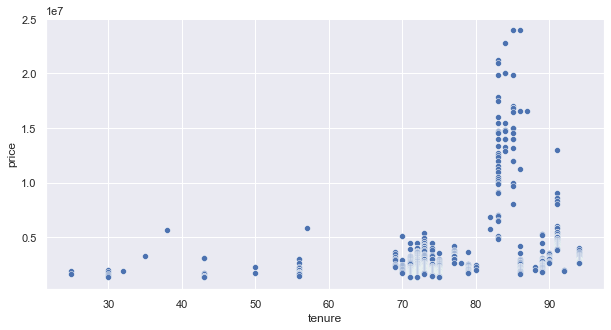

In [154]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = merged_house99['price'], x = merged_house99['tenure'])
#plt.axvline(x=99, color = 'red')

<AxesSubplot:xlabel='tenure', ylabel='price'>

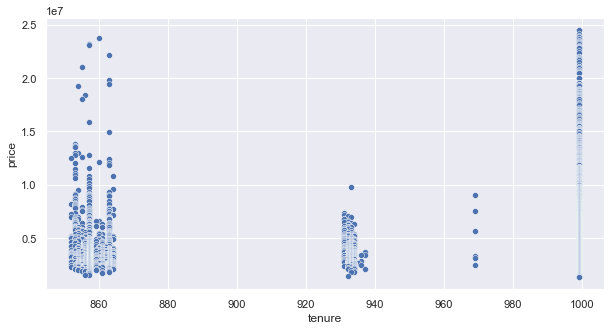

In [155]:
plt.figure(figsize=(10,5))
sns.scatterplot(y = freehold['price'], x = freehold['tenure'])

Summary of the models for Y target Variable Price

|Description/Dataset|Model|Train|Test|RMSE|overfitting|
|---|---|---|---|---|---|
|merged_house1,2 outlier removed only|Linear Regression|0.809|0.840|2421679|Yes|
|merged_houseP, remove top 2.5% and bottom 2.5% Price|Linear Regression|0.852|0.874|1100494|No|
|merged_houseP, remove top 2.5% and bottom 2.5% Price|XGboost|0.909|0.910|860700|No|
|merged_houseP, remove top 2.5% and bottom 2.5% Price|Random Forest|0.910|0.905|856674|No|
|merged_house99, split into =<99 years tenure|XGboost|0.939|0.918|713246|Slight|
|freehold, split into >99 years tenure|XGboost|0.911|0.892|866714|Slight|